In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import plotly.express as px
from adjustText import adjust_text
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [3]:
# --- Load all price files
files = glob.glob("../../data/clean/stock_prices_clean/*.csv")
frames = []
for f in files:
    ticker = f.split("/")[-1].replace(".csv", "")
    df = pd.read_csv(f, parse_dates=["date"])
    df["ticker"] = ticker.split("\\")[-1]
    frames.append(df)


In [4]:
market = pd.concat(frames)
market.head()

date       open       high        low      close     volume  \
0 2018-01-03  19.562585  19.749109  19.547663  19.719265  5519259.0   
1 2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092.0   
2 2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594.0   
3 2018-01-08  20.099777  20.137081  19.920715  20.092316  5029780.0   
4 2018-01-09  19.972940  20.196768  19.935636  20.196768  6974533.0   

   adj close   ticker  
0  19.719265  ABBN.SW  
1  19.935635  ABBN.SW  
2  20.084852  ABBN.SW  
3  20.092316  ABBN.SW  
4  20.196768  ABBN.SW

In [5]:
market = market.sort_values(["ticker", "date"])


In [6]:
ticker_to_name = {
    "ABBN.SW": "ABB",
    "ALC.SW": "Alcon",
    "ALPN.SW": "Alpine",
    "ARYN.SW": "Aryzta",
    "BALN.SW": "Baloise",
    "BKW.SW": "BKW Energie",
    "BLKB.SW": "BLKB",
    "EMMN.SW": "Emmi",
    "GIVN.SW": "Givaudan",
    "HELN.SW": "Helvetia",
    "HOLN.SW": "Holcim",
    "BAER.SW": "Julius Baer",
    "LAND.SW": "Landis",
    "LOGN.SW": "Logitech",
    "LONN.SW": "Lonza",
    "NESN.SW": "Nestle",
    "NOVN.SW": "Novartis",
    "REHN.SW": "Reishauer",
    "CFR.SW": "Richemont",
    "ROG.SW": "Roche",
    "SANN.SW": "Santhera",
    "UHR.SW": "Swatch",
    "SPSN.SW": "Swiss Prime Site",
    "SCMN.SW": "Swisscom",
    "SLHN.SW": "Swiss Life",
    "SQN.SW": "Swissquote",
    "SREN.SW": "Swiss Re",
    "UBSG.SW": "UBS",
    "VONN.SW": "Vontobel",
    "ZURN.SW": "Zurich Insurance"
}

In [7]:
market["ticker"] = market["ticker"].replace(ticker_to_name)


In [8]:
# Explicit sector mapping for all tickers in the dataset
ticker_to_sector = {
    'ABB': 'Real Estate - Energy - Industrials',
    'Alcon': 'Health Care',
    'Alpine': 'Consumer Discretionary',
    'Aryzta': 'Consumer Staples',
    'BKW Energie': 'Real Estate - Energy - Industrials',
    'BLKB': 'Banking',
    'Baloise': 'Insurance',
    'Emmi': 'Consumer Staples',
    'Givaudan': 'Materials',
    'Helvetia': 'Insurance',
    'Holcim': 'Materials',
    'Julius Baer': 'Banking',
    'Landis': 'Real Estate - Energy - Industrials',
    'Logitech': 'Technology',
    'Lonza': 'Health Care',
    'Nestle': 'Consumer Staples',
    'Novartis': 'Health Care',
    'Reishauer': 'Real Estate - Energy - Industrials',
    'Richemont': 'Consumer Discretionary',
    'Roche': 'Health Care',
    'Santhera': 'Health Care',
    'Swatch': 'Consumer Discretionary',
    'Swiss Life': 'Insurance',
    'Swiss Prime Site': 'Real Estate - Energy - Industrials',
    'Swiss Re': 'Insurance',
    'Swisscom': 'Technology',
    'Swissquote': 'Banking',
    'UBS': 'Banking',
    'Vontobel': 'Banking',
    'Zurich Insurance': 'Insurance'
}



ticker_to_cap = {'ABB': 'Mid Cap',
 'Alcon': 'Small Cap',
 'Alpine': 'Large Cap',
 'Aryzta': 'Mid Cap',
 'BKW Energie': 'Small Cap',
 'BLKB': 'Large Cap',
 'Baloise': 'Mid Cap',
 'Emmi': 'Mid Cap',
 'Givaudan': 'Small Cap',
 'Helvetia': 'Small Cap',
 'Holcim': 'Small Cap',
 'Julius Baer': 'Large Cap',
 'Landis': 'Mid Cap',
 'Logitech': 'Mid Cap',
 'Lonza': 'Small Cap',
 'Nestle': 'Small Cap',
 'Novartis': 'Mid Cap',
 'Reishauer': 'Small Cap',
 'Richemont': 'Large Cap',
 'Roche': 'Mid Cap',
 'Santhera': 'Mid Cap',
 'Swatch': 'Small Cap',
 'Swiss Life': 'Large Cap',
 'Swiss Prime Site': 'Large Cap',
 'Swiss Re': 'Mid Cap',
 'Swisscom': 'Small Cap',
 'Swissquote': 'Mid Cap',
 'UBS': 'Small Cap',
 'Vontobel': 'Small Cap',
 'Zurich Insurance': 'Mid Cap'}


# Map sector and cap information as new columns to the dataframe
market['sector'] = market['ticker'].map(ticker_to_sector)
market['cap'] = market['ticker'].map(ticker_to_cap)

In [9]:
market.head()

date       open       high        low      close     volume  \
0 2018-01-03  19.562585  19.749109  19.547663  19.719265  5519259.0   
1 2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092.0   
2 2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594.0   
3 2018-01-08  20.099777  20.137081  19.920715  20.092316  5029780.0   
4 2018-01-09  19.972940  20.196768  19.935636  20.196768  6974533.0   

   adj close ticker                              sector      cap  
0  19.719265    ABB  Real Estate - Energy - Industrials  Mid Cap  
1  19.935635    ABB  Real Estate - Energy - Industrials  Mid Cap  
2  20.084852    ABB  Real Estate - Energy - Industrials  Mid Cap  
3  20.092316    ABB  Real Estate - Energy - Industrials  Mid Cap  
4  20.196768    ABB  Real Estate - Energy - Industrials  Mid Cap

## 1. Sanity-check the market data

In [10]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52454 entries, 0 to 1758
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       52454 non-null  datetime64[ns]
 1   open       52454 non-null  float64       
 2   high       52454 non-null  float64       
 3   low        52454 non-null  float64       
 4   close      52454 non-null  float64       
 5   volume     52454 non-null  float64       
 6   adj close  52454 non-null  float64       
 7   ticker     52454 non-null  object        
 8   sector     52454 non-null  object        
 9   cap        52454 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 4.4+ MB


In [11]:
market.head()

date       open       high        low      close     volume  \
0 2018-01-03  19.562585  19.749109  19.547663  19.719265  5519259.0   
1 2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092.0   
2 2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594.0   
3 2018-01-08  20.099777  20.137081  19.920715  20.092316  5029780.0   
4 2018-01-09  19.972940  20.196768  19.935636  20.196768  6974533.0   

   adj close ticker                              sector      cap  
0  19.719265    ABB  Real Estate - Energy - Industrials  Mid Cap  
1  19.935635    ABB  Real Estate - Energy - Industrials  Mid Cap  
2  20.084852    ABB  Real Estate - Energy - Industrials  Mid Cap  
3  20.092316    ABB  Real Estate - Energy - Industrials  Mid Cap  
4  20.196768    ABB  Real Estate - Energy - Industrials  Mid Cap

In [12]:
# basic QC
n_rows = len(market)
n_nulls = market.isna().sum()
dups = market.duplicated(subset=['ticker','date']).sum()
print(f"rows={n_rows}, duplicates={dups}\n", n_nulls)

rows=52454, duplicates=0
 date         0
open         0
high         0
low          0
close        0
volume       0
adj close    0
ticker       0
sector       0
cap          0
dtype: int64


## 2. Returns and Volatility

In [13]:
# make sure types and order are correct
market['date'] = pd.to_datetime(market['date'])
market = market.sort_values(['ticker','date']).reset_index(drop=True)
market['close'] = market['close'].astype(float)

# % returns (aligned by index)
market['return'] = market.groupby('ticker')['close'].pct_change()



In [14]:
market['log_return'] = (
    market.groupby('ticker')['close']
          .transform(lambda s: np.log(s).diff())
)

In [15]:
market['ticker'].unique()

array(['ABB', 'Alcon', 'Alpine', 'Aryzta', 'BKW Energie', 'BLKB',
       'Baloise', 'Emmi', 'Givaudan', 'Helvetia', 'Holcim', 'Julius Baer',
       'Landis', 'Logitech', 'Lonza', 'Nestle', 'Novartis', 'Reishauer',
       'Richemont', 'Roche', 'Santhera', 'Swatch', 'Swiss Life',
       'Swiss Prime Site', 'Swiss Re', 'Swisscom', 'Swissquote', 'UBS',
       'Vontobel', 'Zurich Insurance'], dtype=object)

In [16]:
market.head()

date       open       high        low      close     volume  \
0 2018-01-03  19.562585  19.749109  19.547663  19.719265  5519259.0   
1 2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092.0   
2 2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594.0   
3 2018-01-08  20.099777  20.137081  19.920715  20.092316  5029780.0   
4 2018-01-09  19.972940  20.196768  19.935636  20.196768  6974533.0   

   adj close ticker                              sector      cap    return  \
0  19.719265    ABB  Real Estate - Energy - Industrials  Mid Cap       NaN   
1  19.935635    ABB  Real Estate - Energy - Industrials  Mid Cap  0.010972   
2  20.084852    ABB  Real Estate - Energy - Industrials  Mid Cap  0.007485   
3  20.092316    ABB  Real Estate - Energy - Industrials  Mid Cap  0.000372   
4  20.196768    ABB  Real Estate - Energy - Industrials  Mid Cap  0.005199   

   log_return  
0         NaN  
1    0.010913  
2    0.007457  
3    0.000372  
4    0.005185

In [17]:
market.tail()

date        open        high         low       close    volume  \
52449 2024-12-19  513.891927  513.891927  506.862698  511.232239  373666.0   
52450 2024-12-20  504.203010  506.672766  498.883635  506.292786  975263.0   
52451 2024-12-23  505.342878  512.562039  505.342878  511.992126  214441.0   
52452 2024-12-27  511.802170  512.562073  506.482794  512.562073  153590.0   
52453 2024-12-30  510.852262  513.132027  509.712379  511.802155  190986.0   

        adj close            ticker     sector      cap    return  log_return  
52449  511.232239  Zurich Insurance  Insurance  Mid Cap -0.017525   -0.017680  
52450  506.292786  Zurich Insurance  Insurance  Mid Cap -0.009662   -0.009709  
52451  511.992126  Zurich Insurance  Insurance  Mid Cap  0.011257    0.011194  
52452  512.562073  Zurich Insurance  Insurance  Mid Cap  0.001113    0.001113  
52453  511.802155  Zurich Insurance  Insurance  Mid Cap -0.001483   -0.001484

In [18]:
# Aggregate mean and std for both return and log_return
df_summary = (
    market.groupby(['ticker', 'sector', 'cap'])[['return', 'log_return']]
    .agg(['mean', 'std'])
    .reset_index()
)

# Clean column names for easier access
df_summary.columns = ['ticker', 'sector', 'cap', 'return_mean', 'return_std', 'log_return_mean', 'log_return_std']

# Inspect the result
df_summary.head()


ticker                              sector        cap  return_mean  \
0          ABB  Real Estate - Energy - Industrials    Mid Cap     0.000627   
1        Alcon                         Health Care  Small Cap     0.000456   
2       Alpine              Consumer Discretionary  Large Cap     0.000039   
3       Aryzta                    Consumer Staples    Mid Cap    -0.000378   
4  BKW Energie  Real Estate - Energy - Industrials  Small Cap     0.000755   

   return_std  log_return_mean  log_return_std  
0    0.015421         0.000508        0.015478  
1    0.017417         0.000306        0.017272  
2    0.010267        -0.000013        0.010261  
3    0.033312        -0.000941        0.033684  
4    0.014932         0.000644        0.014860

In [19]:
df_summary = df_summary.rename(columns={
    'return_mean': 'avg_daily_return',
    'return_std': 'daily_volatility',
    'log_return_mean': 'avg_log_return',
    'log_return_std': 'log_volatility'
})

df_summary.head()


ticker                              sector        cap  \
0          ABB  Real Estate - Energy - Industrials    Mid Cap   
1        Alcon                         Health Care  Small Cap   
2       Alpine              Consumer Discretionary  Large Cap   
3       Aryzta                    Consumer Staples    Mid Cap   
4  BKW Energie  Real Estate - Energy - Industrials  Small Cap   

   avg_daily_return  daily_volatility  avg_log_return  log_volatility  
0          0.000627          0.015421        0.000508        0.015478  
1          0.000456          0.017417        0.000306        0.017272  
2          0.000039          0.010267       -0.000013        0.010261  
3         -0.000378          0.033312       -0.000941        0.033684  
4          0.000755          0.014932        0.000644        0.014860

In [20]:
TRADING_DAYS = 252

df_summary['annual_return'] = (1 + df_summary['avg_daily_return']) ** TRADING_DAYS - 1
df_summary['annual_volatility'] = df_summary['daily_volatility'] * np.sqrt(TRADING_DAYS)

df_summary['annual_log_return'] = df_summary['avg_log_return'] * TRADING_DAYS
df_summary['annual_log_volatility'] = df_summary['log_volatility'] * np.sqrt(TRADING_DAYS)

df_summary.head()


ticker                              sector        cap  \
0          ABB  Real Estate - Energy - Industrials    Mid Cap   
1        Alcon                         Health Care  Small Cap   
2       Alpine              Consumer Discretionary  Large Cap   
3       Aryzta                    Consumer Staples    Mid Cap   
4  BKW Energie  Real Estate - Energy - Industrials  Small Cap   

   avg_daily_return  daily_volatility  avg_log_return  log_volatility  \
0          0.000627          0.015421        0.000508        0.015478   
1          0.000456          0.017417        0.000306        0.017272   
2          0.000039          0.010267       -0.000013        0.010261   
3         -0.000378          0.033312       -0.000941        0.033684   
4          0.000755          0.014932        0.000644        0.014860   

   annual_return  annual_volatility  annual_log_return  annual_log_volatility  
0       0.171146           0.244801           0.127907               0.245708  
1       0.121714           0.276485           0.077112               0.274186  
2       0.009955           0.162982          -0.003355               0.162882  
3      -0.090970           0.528809          -0.237031               0.534717  
4       0.209504           0.237042           0.162337               0.235900

In [21]:
df_summary.to_csv("../../tables/market_risk_return_summary_annual.csv", index=False)
print("✅ Saved annualized summary to ../data/clean/market_risk_return_summary_annual.csv")


✅ Saved annualized summary to ../data/clean/market_risk_return_summary_annual.csv


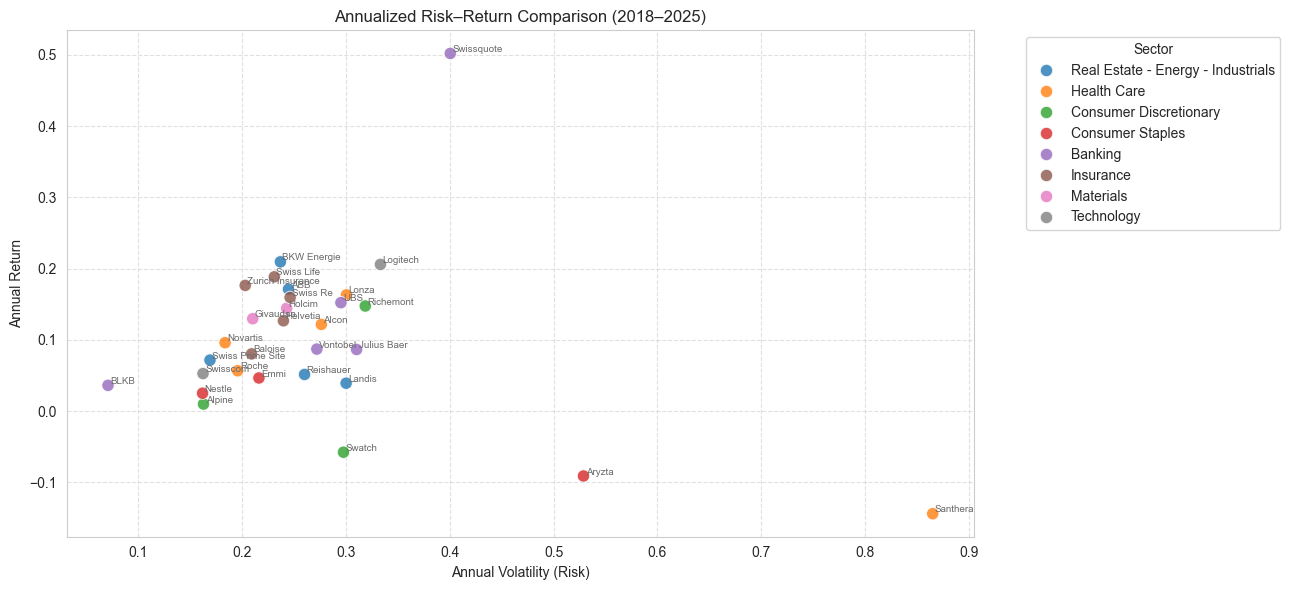

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_summary,
    x='annual_volatility',
    y='annual_return',
    hue='sector',
    s=80, alpha=0.8
)

for i, row in df_summary.iterrows():
    plt.text(row['annual_volatility'] + 0.002,
             row['annual_return'] + 0.002,
             row['ticker'],
             fontsize=7, color='dimgray')

plt.title("Annualized Risk–Return Comparison (2018–2025)")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Annual Return")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../../figures/market_exploration/annualized_risk_return_comparison_sector.png")
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


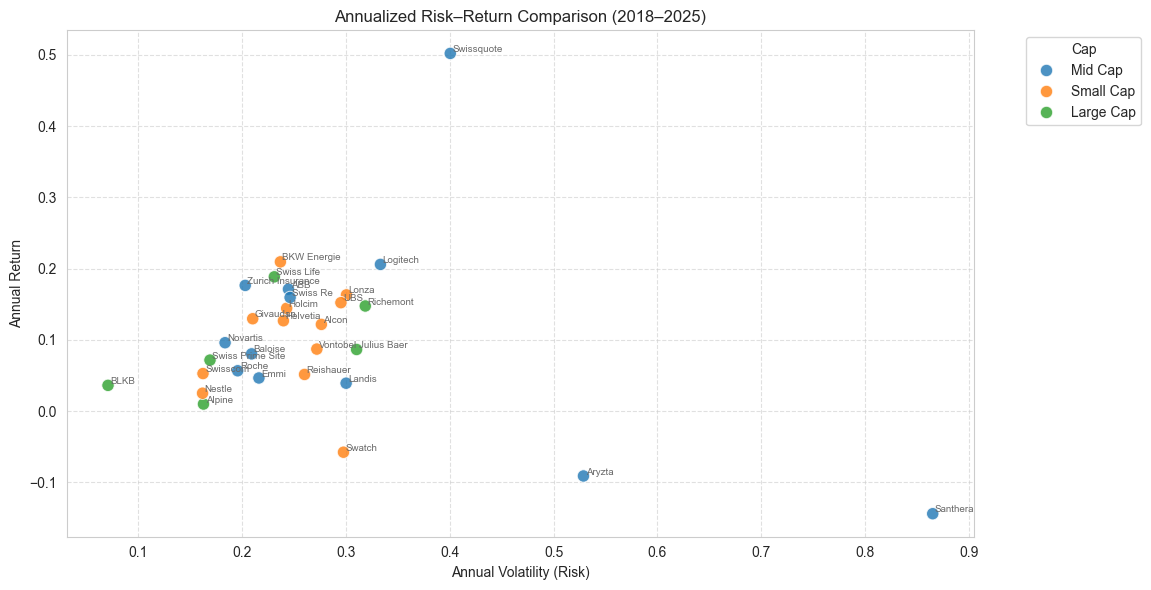

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_summary,
    x='annual_volatility',
    y='annual_return',
    hue='cap',
    s=80, alpha=0.8
)

for i, row in df_summary.iterrows():
    plt.text(row['annual_volatility'] + 0.002,
             row['annual_return'] + 0.002,
             row['ticker'],
             fontsize=7, color='dimgray')


plt.title("Annualized Risk–Return Comparison (2018–2025)")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Annual Return")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../../figures/market_exploration/annualized_risk_return_comparison_cap.png")
plt.legend(title='Cap', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

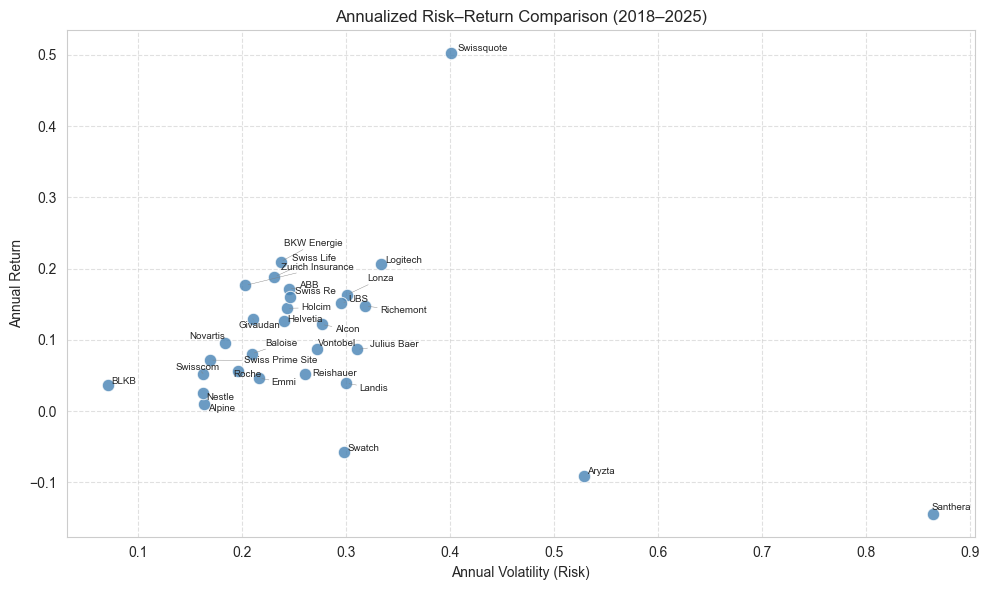

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_summary,
    x='annual_volatility',
    y='annual_return',
    s=80, color='steelblue', alpha=0.8
)

texts = []
for i, row in df_summary.iterrows():
    texts.append(
        plt.text(row['annual_volatility'],
                 row['annual_return'],
                 row['ticker'],
                 fontsize=7)
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.3))

plt.title("Annualized Risk–Return Comparison (2018–2025)")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Annual Return")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../../figures/market_exploration/annualized_risk_return_comparison.png")
plt.show()


Top 5 sectors: highest return and least volatility (best risk-adjusted):


sector  annual_return  annual_volatility  \
0                           Insurance         0.1463             0.2260   
1                             Banking         0.1728             0.2699   
2                           Materials         0.1370             0.2267   
3                          Technology         0.1293             0.2479   
4  Real Estate - Energy - Industrials         0.1086             0.2423   

   risk_adjusted  
0         0.6474  
1         0.6402  
2         0.6043  
3         0.5216  
4         0.4481

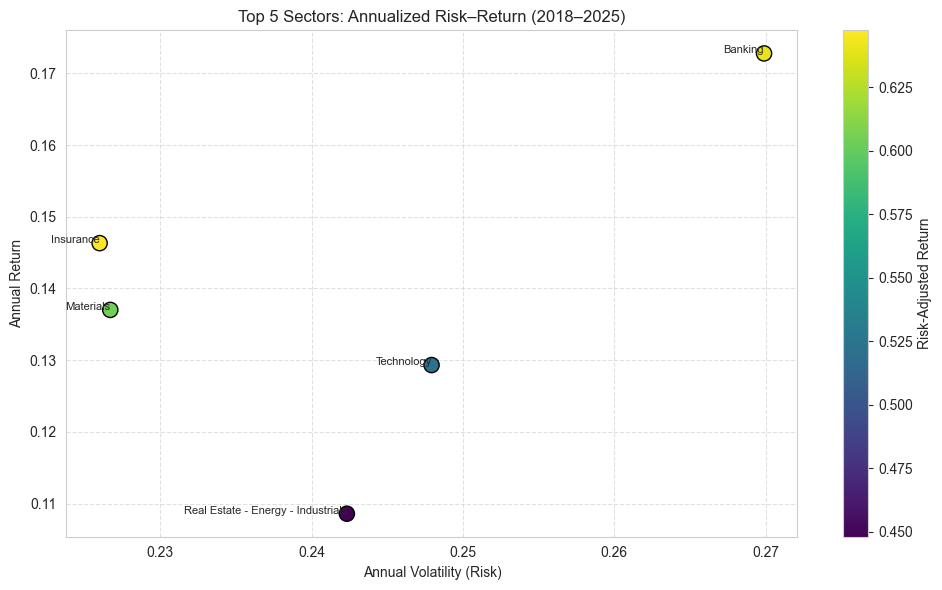

In [25]:
# --- Top Sectors by Risk-Adjusted Return ---

# Compute risk-adjusted return for each sector
df_sector = (
    df_summary
    .groupby('sector', as_index=False)
    .agg(
        annual_return=('annual_return', 'mean'),
        annual_volatility=('annual_volatility', 'mean')
    )
)
df_sector['risk_adjusted'] = df_sector['annual_return'] / df_sector['annual_volatility']

# Sort and select top 5 sectors
top5_sectors = (
    df_sector
    .sort_values('risk_adjusted', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top5_sectors.to_csv("../../tables/top5_sectors_overall.csv", index=False)

print("Top 5 sectors: highest return and least volatility (best risk-adjusted):")
display(
    top5_sectors[
        ['sector', 'annual_return', 'annual_volatility', 'risk_adjusted']
    ].round({'annual_return': 4, 'annual_volatility': 4, 'risk_adjusted': 4})
)

# Plot the top 5 sectors by risk-adjusted return, similar to the annualized risk-return plot above
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    top5_sectors['annual_volatility'],
    top5_sectors['annual_return'],
    c=top5_sectors['risk_adjusted'],
    cmap='viridis',
    s=120,
    edgecolor='black'
)
for i, row in top5_sectors.iterrows():
    plt.text(
        row['annual_volatility'],
        row['annual_return'],
        row['sector'],
        fontsize=8,
        ha='right'
    )
plt.title("Top 5 Sectors: Annualized Risk–Return (2018–2025)")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Annual Return")
plt.colorbar(scatter, label='Risk-Adjusted Return')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../../figures/market_exploration/top5_sectors_risk_return.png")
plt.show()

Top 5 caps: highest return and least volatility (best risk-adjusted):


cap  annual_return  annual_volatility  risk_adjusted
0  Large Cap         0.0900             0.2106         0.4275
1  Small Cap         0.1005             0.2465         0.4078
2    Mid Cap         0.1082             0.3273         0.3307

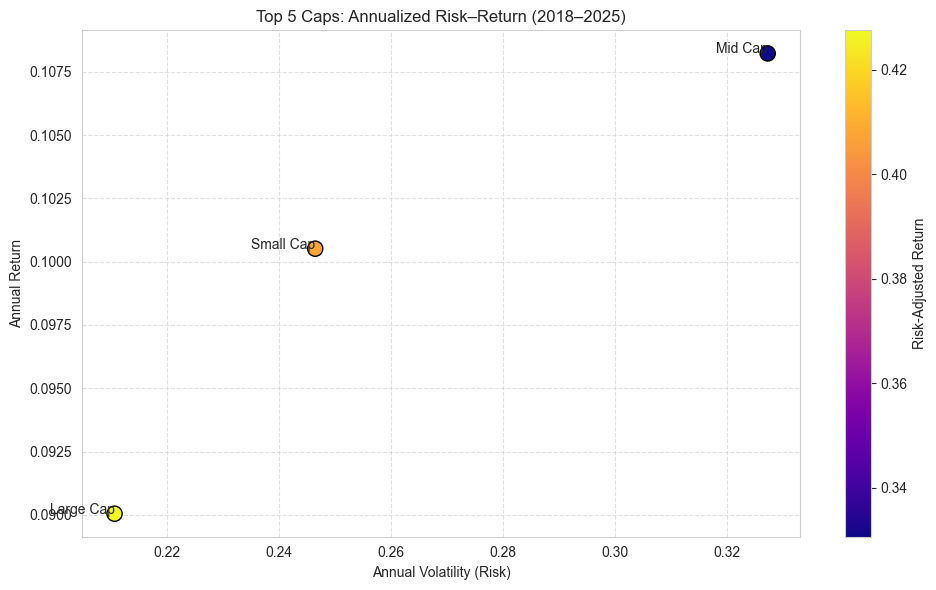

In [26]:
# --- Top Caps by Risk-Adjusted Return ---
# Compute risk-adjusted return for each cap
df_cap = (
    df_summary
    .groupby('cap', as_index=False)
    .agg(
        annual_return=('annual_return', 'mean'),
        annual_volatility=('annual_volatility', 'mean')
    )
)
df_cap['risk_adjusted'] = df_cap['annual_return'] / df_cap['annual_volatility']



# Sort and select top 5 caps
top5_caps = (
    df_cap
    .sort_values('risk_adjusted', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top5_caps.to_csv("../../tables/top5_caps_overall.csv", index=False)

print("Top 5 caps: highest return and least volatility (best risk-adjusted):")
display(
    top5_caps[
        ['cap', 'annual_return', 'annual_volatility', 'risk_adjusted']
    ].round({'annual_return': 4, 'annual_volatility': 4, 'risk_adjusted': 4})
)


# Plot the top 5 caps by risk-adjusted return, similar to the annualized risk-return plot above
plt.figure(figsize=(10, 6))
scatter_cap = plt.scatter(
    top5_caps['annual_volatility'],
    top5_caps['annual_return'],
    c=top5_caps['risk_adjusted'],
    cmap='plasma',
    s=120,
    edgecolor='black'
)
for i, row in top5_caps.iterrows():
    plt.text(
        row['annual_volatility'],
        row['annual_return'],
        row['cap'],
        fontsize=10,
        ha='right'
    )
plt.title("Top 5 Caps: Annualized Risk–Return (2018–2025)")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Annual Return")
plt.colorbar(scatter_cap, label='Risk-Adjusted Return')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../../figures/market_exploration/top5_caps_risk_return.png")
plt.show()

## Top Companies by Risk-Adjusted Return

In [27]:
# Find top 5 companies with highest average annual return and lowest volatility (best risk-adjusted)

# Sort the summary DataFrame by risk-adjusted performance (annual return / annual volatility)
df_summary['risk_adjusted'] = df_summary['annual_return'] / df_summary['annual_volatility']

top5_companies = (
    df_summary
    .sort_values('risk_adjusted', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top5_companies.to_csv("../../tables/top5_companies_overall.csv", index=False)

print("Top 5 companies: highest return and least volatility (best risk-adjusted):")
display(
    top5_companies[
        ['ticker', 'sector', 'cap', 'annual_return', 'annual_volatility', 'risk_adjusted']
    ].round({'annual_return': 4, 'annual_volatility': 4, 'risk_adjusted': 4})
)


Top 5 companies: highest return and least volatility (best risk-adjusted):


ticker                              sector        cap  \
0        Swissquote                             Banking    Mid Cap   
1       BKW Energie  Real Estate - Energy - Industrials  Small Cap   
2  Zurich Insurance                           Insurance    Mid Cap   
3        Swiss Life                           Insurance  Large Cap   
4               ABB  Real Estate - Energy - Industrials    Mid Cap   

   annual_return  annual_volatility  risk_adjusted  
0         0.5019             0.4006         1.2530  
1         0.2095             0.2370         0.8838  
2         0.1764             0.2032         0.8683  
3         0.1885             0.2312         0.8153  
4         0.1711             0.2448         0.6991

In [28]:
# Identify top 5 companies per year by highest return AND lowest volatility, including sector and cap

# First, calculate annual return and volatility for each ticker per year
market['year'] = pd.to_datetime(market['date']).dt.year

summary_by_year = (
    market.groupby(['ticker', 'year'])
    .agg(
        annual_return = ('return', lambda r: (1 + r).prod() - 1),
        annual_volatility = ('return', lambda r: r.std() * (252**0.5)),
        sector = ('sector', 'first'),
        cap = ('cap', 'first'),
    )
    .reset_index()
)

# For each year, select top 5 companies with highest annual_return and lowest annual_volatility
# We'll use a combined score: annual_return divided by annual_volatility,
# and then pick the top 5 per year.

summary_by_year['risk_adjusted'] = summary_by_year['annual_return'] / summary_by_year['annual_volatility']

top5_by_year = (
    summary_by_year
    .sort_values(['year', 'risk_adjusted'], ascending=[True, False])
    .groupby('year')
    .head(5)
    .sort_values(['year', 'risk_adjusted'], ascending=[True, False])
)

# Display the results
from IPython.display import display

for yr, grp in top5_by_year.groupby('year'):
    # Save results to ../../tables/
    output_dir = "../../tables/"

    results_df = (
        grp[['ticker', 'sector', 'cap', 'annual_return', 'annual_volatility', 'risk_adjusted']]
        .sort_values('risk_adjusted', ascending=False)
        .round({'annual_return': 4, 'annual_volatility': 4, 'risk_adjusted': 4})
        .reset_index(drop=True)
    )

    results_df.to_csv(f"{output_dir}top5_companies_{yr}.csv", index=False)
    print(f"\nTop 5 companies for {yr}:")
    display(results_df)
    print(f"Saved top 5 companies for {yr} to {output_dir}top5_companies_{yr}.csv")



Top 5 companies for 2018:


ticker                              sector        cap  annual_return  \
0  BKW Energie  Real Estate - Energy - Industrials  Small Cap         0.2218   
1   Swiss Life                           Insurance  Large Cap         0.1415   
2         BLKB                             Banking  Large Cap         0.0483   
3     Helvetia                           Insurance  Small Cap         0.0883   
4   Swissquote                             Banking    Mid Cap         0.1522   

   annual_volatility  risk_adjusted  
0             0.1921         1.1549  
1             0.1668         0.8483  
2             0.0714         0.6770  
3             0.1476         0.5984  
4             0.4281         0.3555

Saved top 5 companies for 2018 to ../../tables/top5_companies_2018.csv

Top 5 companies for 2019:


ticker                              sector        cap  \
0  Swiss Prime Site  Real Estate - Energy - Industrials  Large Cap   
1            Landis  Real Estate - Energy - Industrials    Mid Cap   
2  Zurich Insurance                           Insurance    Mid Cap   
3            Nestle                    Consumer Staples  Small Cap   
4          Givaudan                           Materials  Small Cap   

   annual_return  annual_volatility  risk_adjusted  
0         0.4700             0.1136         4.1355  
1         0.9015             0.2498         3.6096  
2         0.4368             0.1242         3.5154  
3         0.3476             0.1343         2.5882  
4         0.3638             0.1412         2.5765

Saved top 5 companies for 2019 to ../../tables/top5_companies_2019.csv

Top 5 companies for 2020:


ticker                              sector        cap  annual_return  \
0     Logitech                          Technology    Mid Cap         0.8981   
1        Lonza                         Health Care  Small Cap         0.6208   
2   Swissquote                             Banking    Mid Cap         0.7993   
3  BKW Energie  Real Estate - Energy - Industrials  Small Cap         0.4292   
4     Givaudan                           Materials  Small Cap         0.2568   

   annual_volatility  risk_adjusted  
0             0.4075         2.2036  
1             0.3391         1.8306  
2             0.4878         1.6384  
3             0.3064         1.4005  
4             0.2578         0.9962

Saved top 5 companies for 2020 to ../../tables/top5_companies_2020.csv

Top 5 companies for 2021:


ticker                              sector        cap  annual_return  \
0  Swissquote                             Banking    Mid Cap         1.3596   
1   Richemont              Consumer Discretionary  Large Cap         0.7464   
2  Swiss Life                           Insurance  Large Cap         0.4189   
3         ABB  Real Estate - Energy - Industrials    Mid Cap         0.4538   
4      Nestle                    Consumer Staples  Small Cap         0.2541   

   annual_volatility  risk_adjusted  
0             0.4034         3.3699  
1             0.2984         2.5010  
2             0.1753         2.3894  
3             0.2065         2.1975  
4             0.1231         2.0636

Saved top 5 companies for 2021 to ../../tables/top5_companies_2021.csv

Top 5 companies for 2022:


ticker                              sector        cap  \
0  Zurich Insurance                           Insurance    Mid Cap   
1              BLKB                             Banking  Large Cap   
2          Novartis                         Health Care    Mid Cap   
3       BKW Energie  Real Estate - Energy - Industrials  Small Cap   
4            Landis  Real Estate - Energy - Industrials    Mid Cap   

   annual_return  annual_volatility  risk_adjusted  
0         0.1611             0.2037         0.7905  
1         0.0393             0.0638         0.6162  
2         0.0875             0.1675         0.5226  
3         0.0909             0.2427         0.3747  
4         0.1002             0.2712         0.3696

Saved top 5 companies for 2022 to ../../tables/top5_companies_2022.csv

Top 5 companies for 2023:


ticker                              sector        cap  annual_return  \
0      Holcim                           Materials  Small Cap         0.4386   
1         UBS                             Banking  Small Cap         0.5624   
2  Swissquote                             Banking    Mid Cap         0.5506   
3         ABB  Real Estate - Energy - Industrials    Mid Cap         0.3679   
4      Aryzta                    Consumer Staples    Mid Cap         0.4096   

   annual_volatility  risk_adjusted  
0             0.1815         2.4169  
1             0.3010         1.8684  
2             0.3182         1.7301  
3             0.2128         1.7286  
4             0.2888         1.4186

Saved top 5 companies for 2023 to ../../tables/top5_companies_2023.csv

Top 5 companies for 2024:


ticker     sector        cap  annual_return  annual_volatility  \
0        Swissquote    Banking    Mid Cap         0.7288             0.2630   
1          Swiss Re  Insurance    Mid Cap         0.4813             0.2153   
2          Helvetia  Insurance  Small Cap         0.3552             0.1642   
3  Zurich Insurance  Insurance    Mid Cap         0.2976             0.1396   
4           Baloise  Insurance    Mid Cap         0.3145             0.1481   

   risk_adjusted  
0         2.7713  
1         2.2356  
2         2.1634  
3         2.1321  
4         2.1231

Saved top 5 companies for 2024 to ../../tables/top5_companies_2024.csv


## Company-level Time Series Analysis


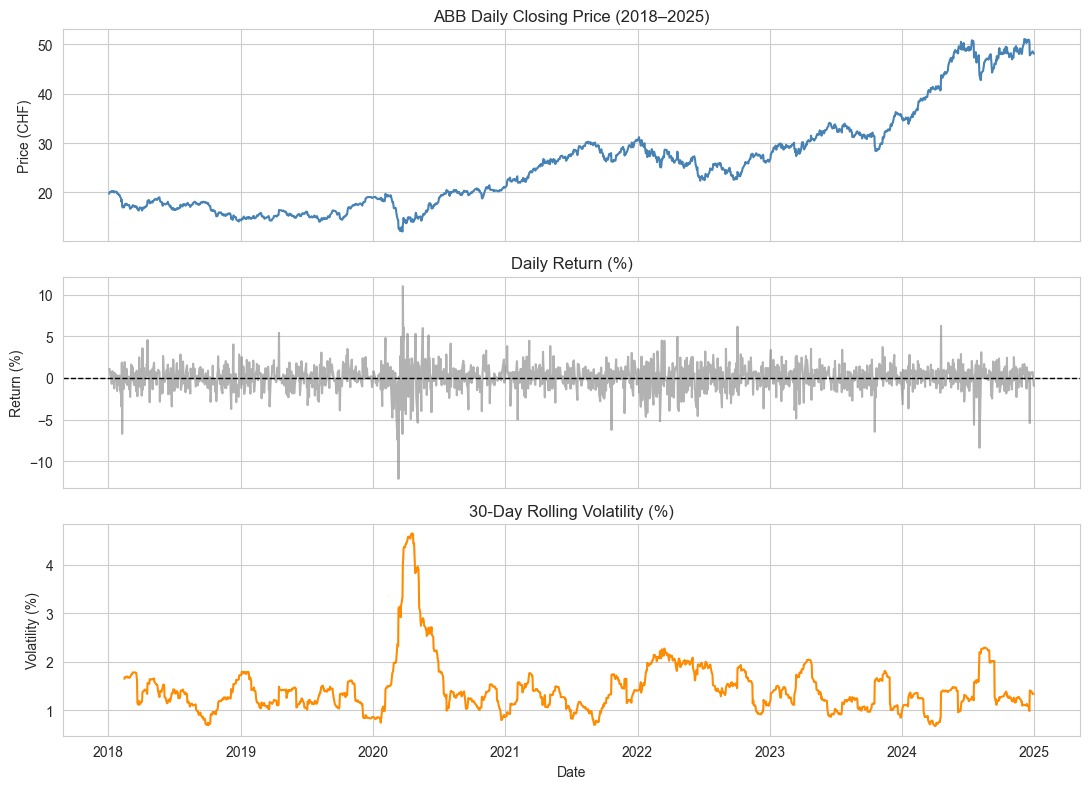

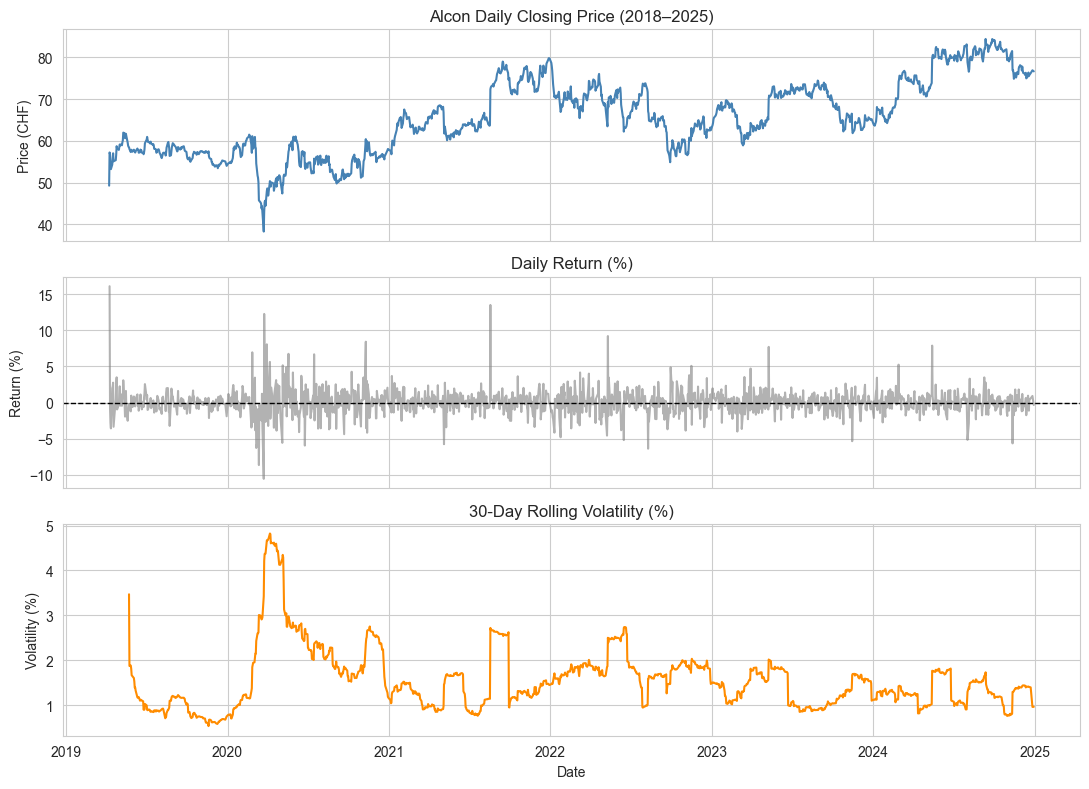

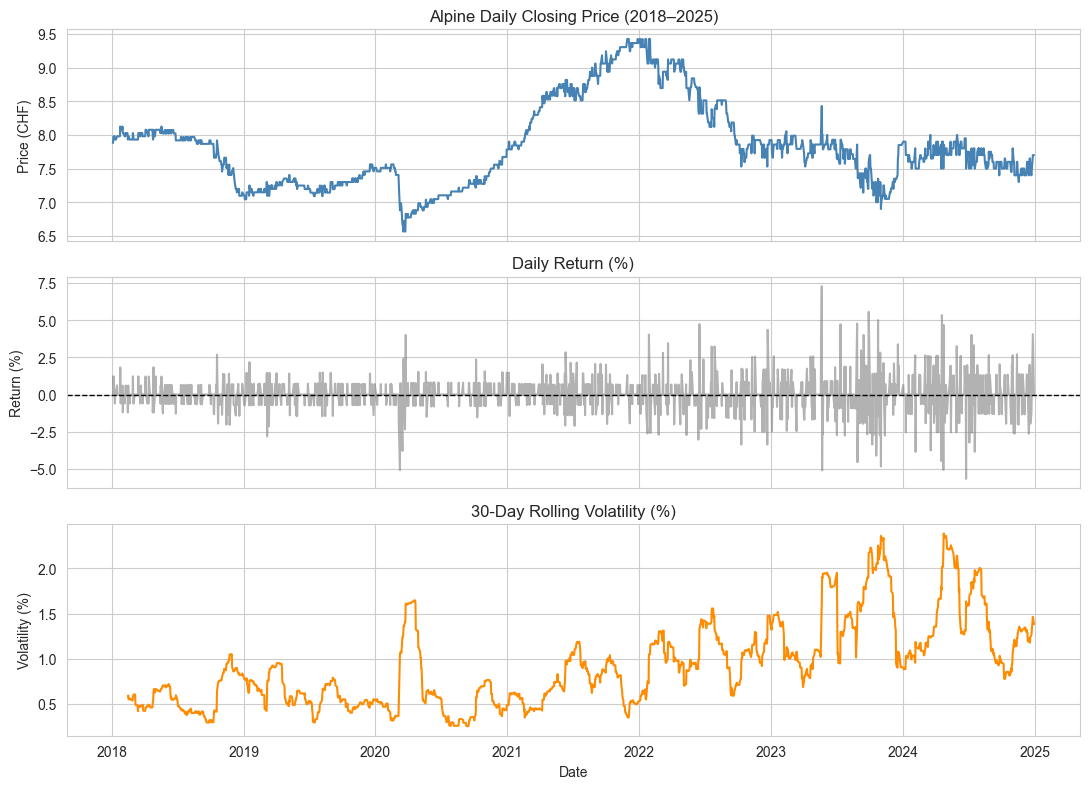

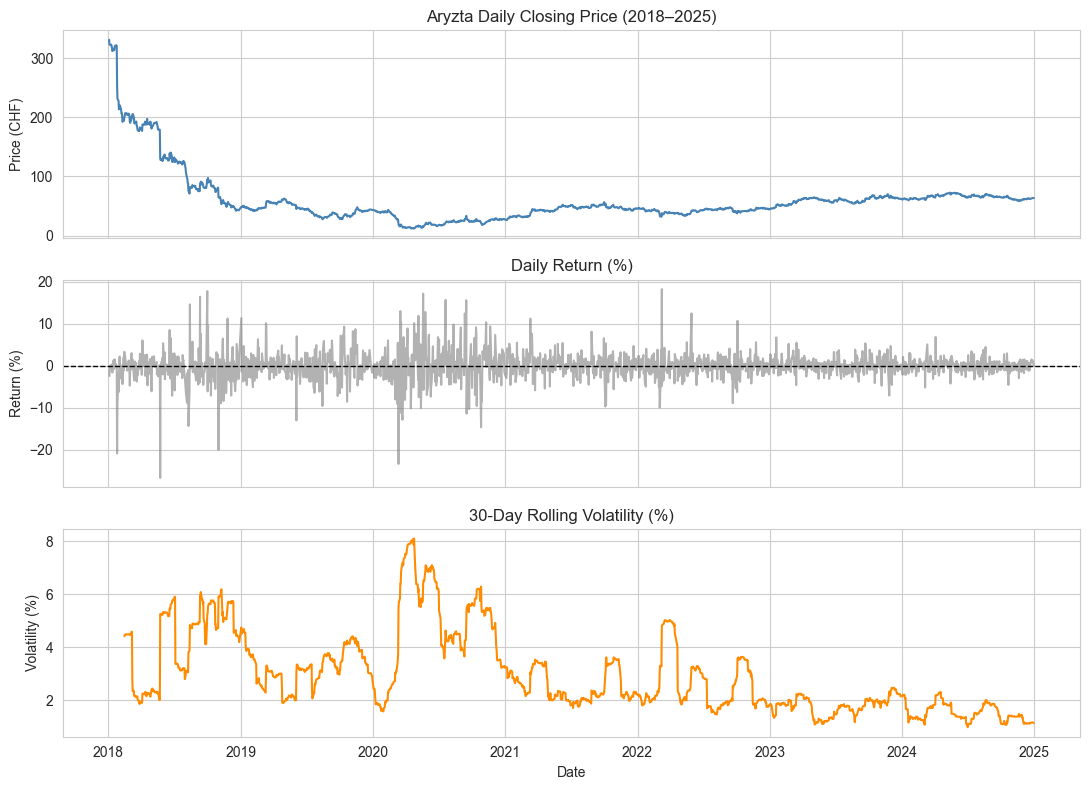

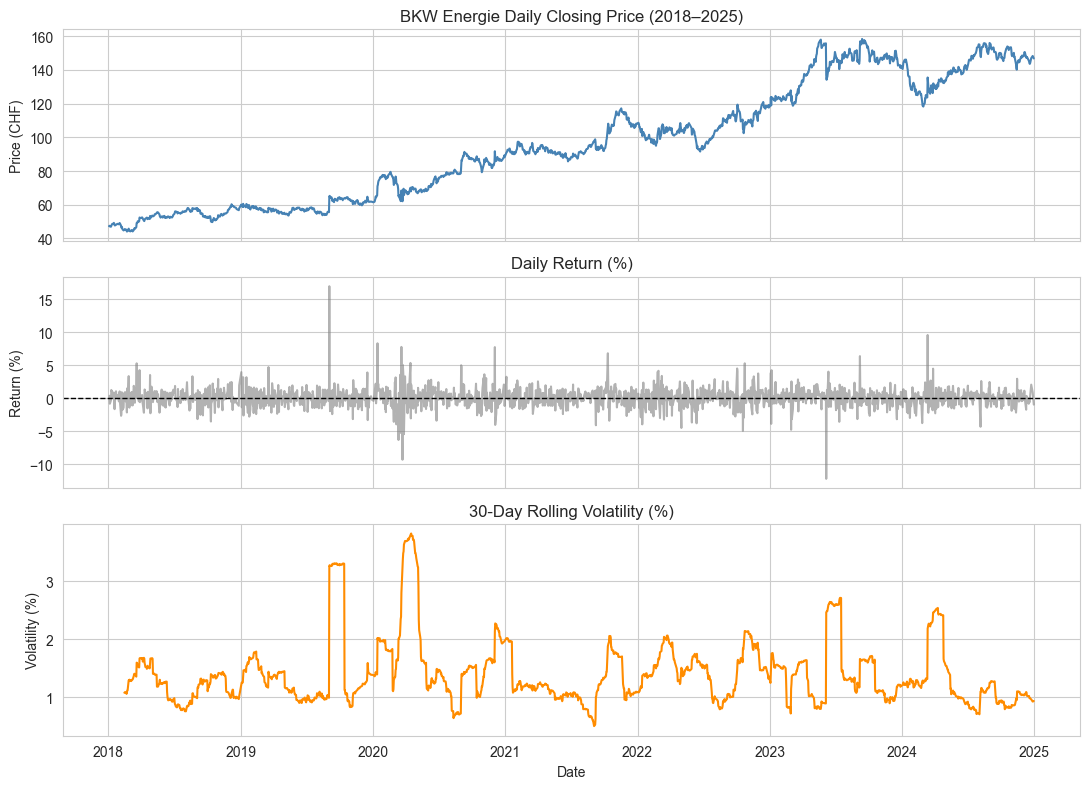

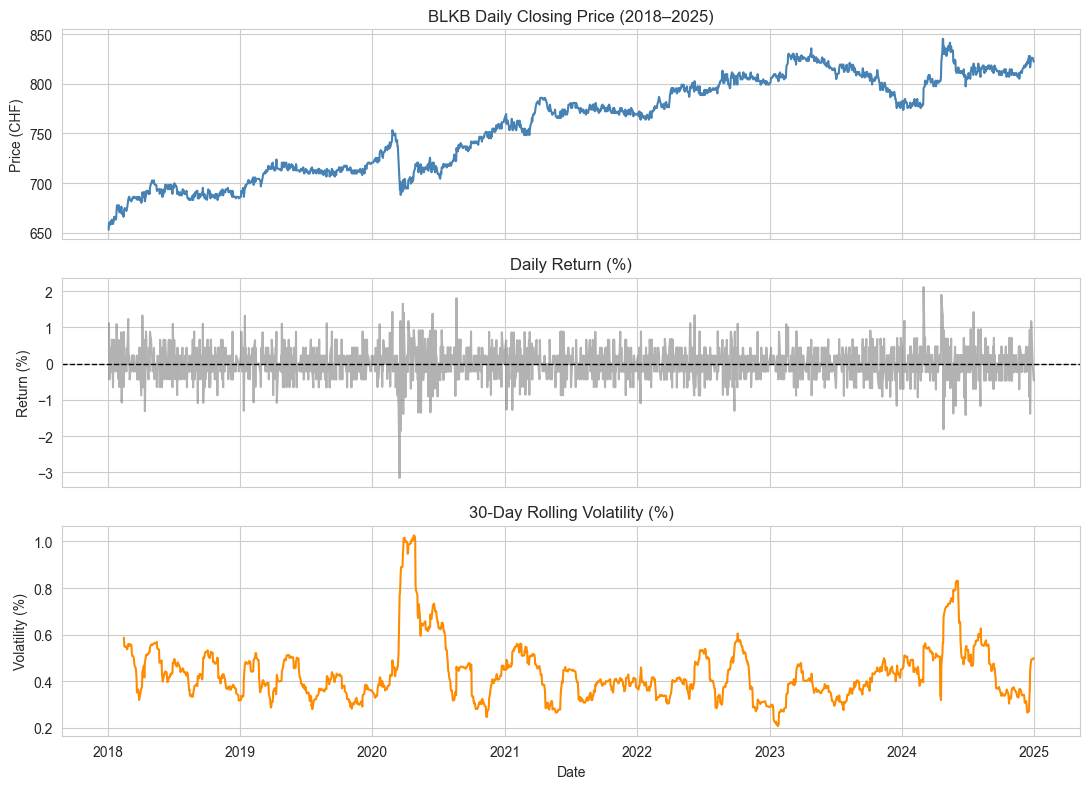

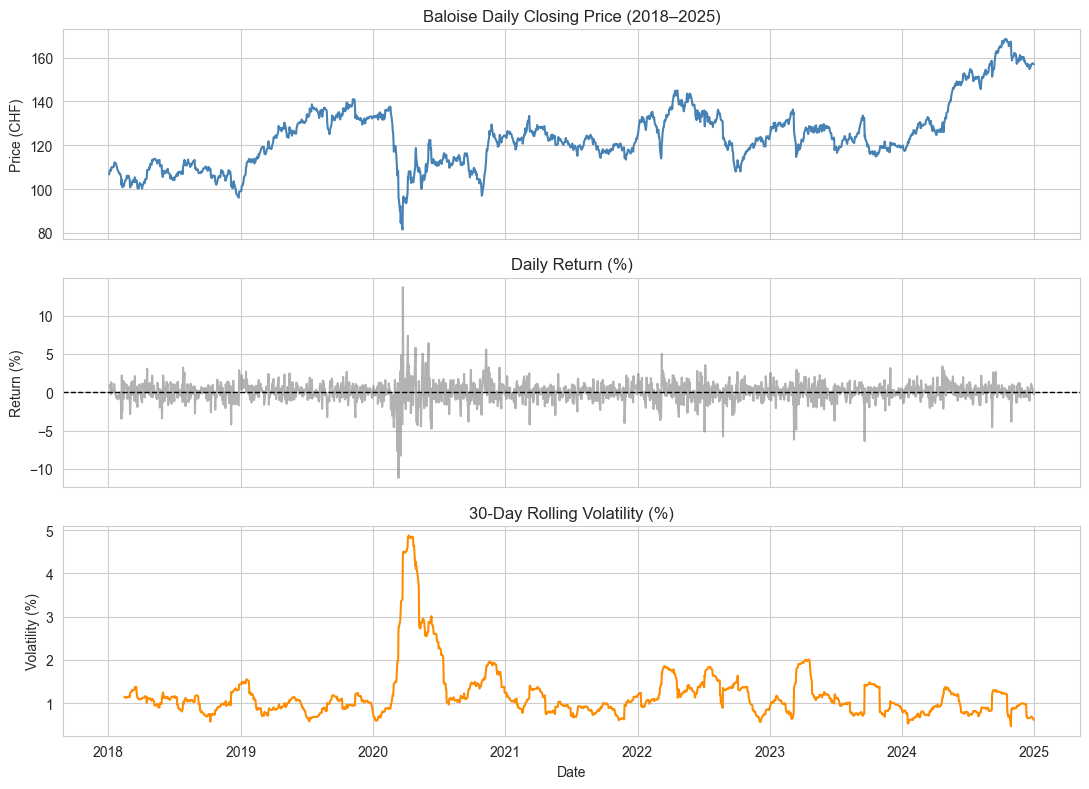

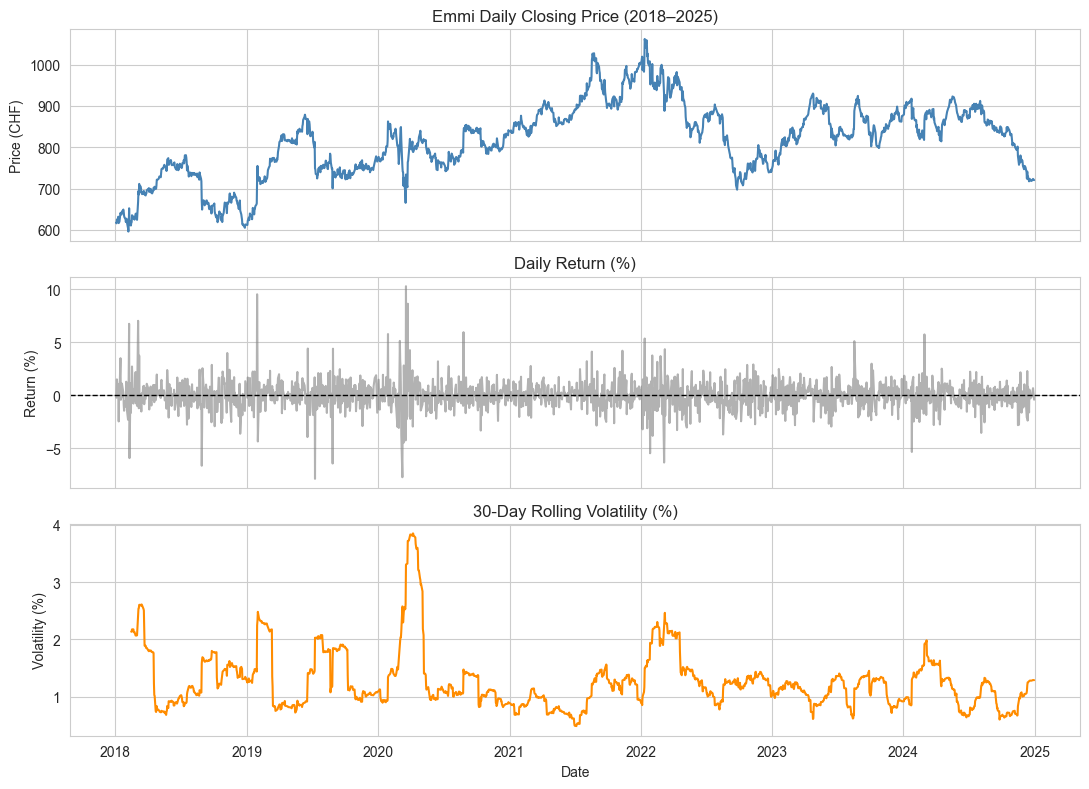

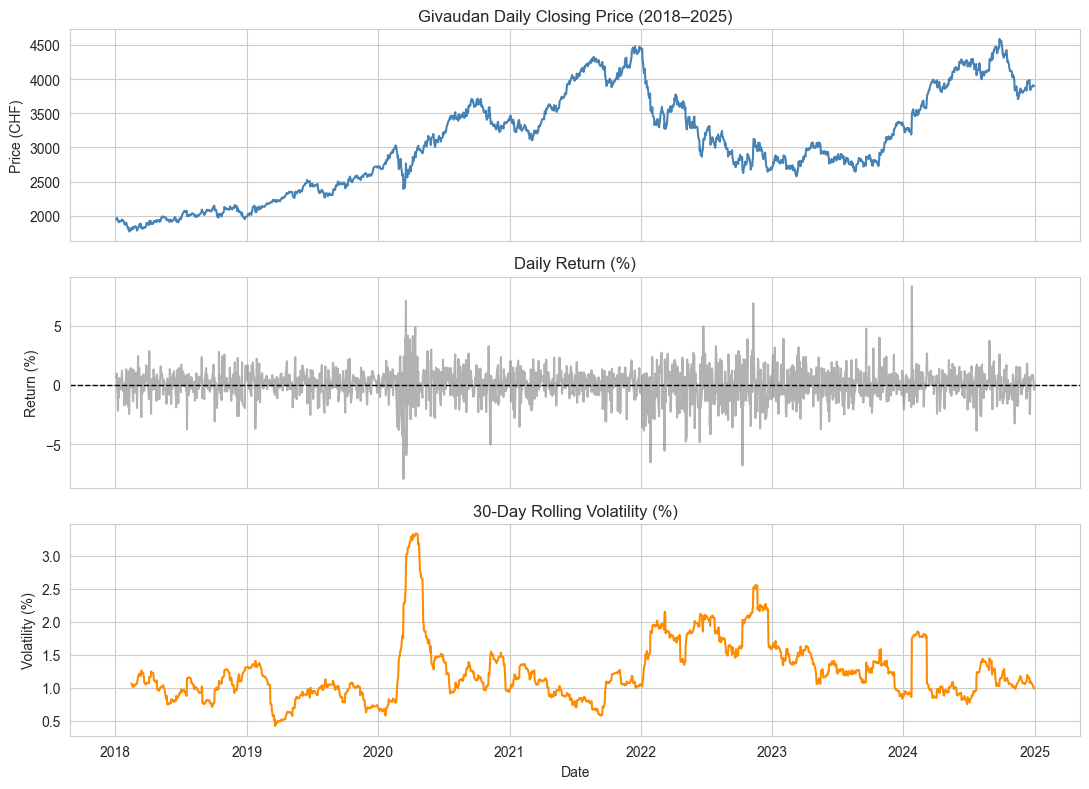

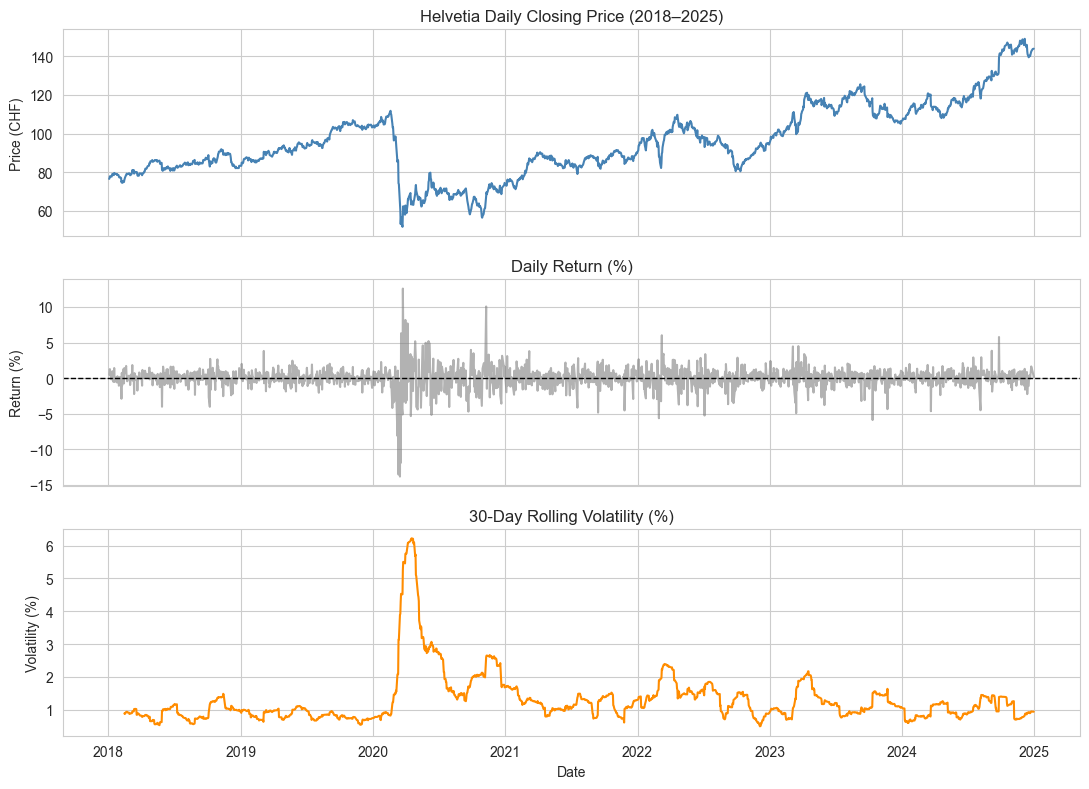

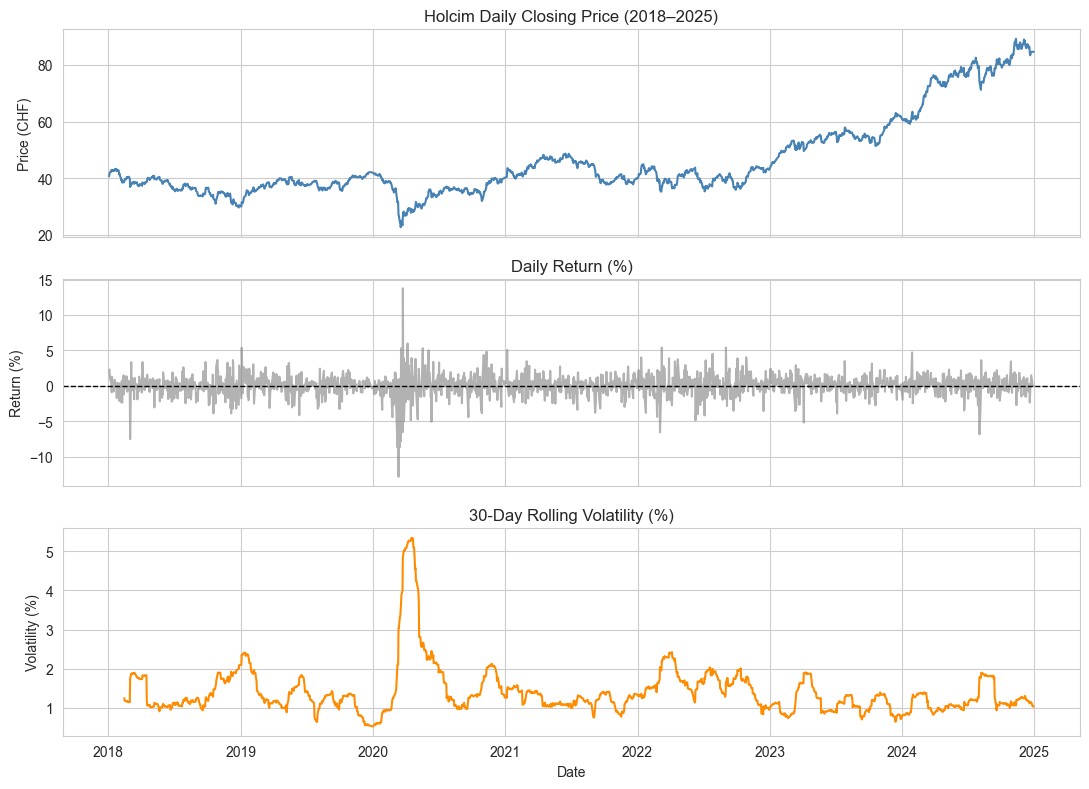

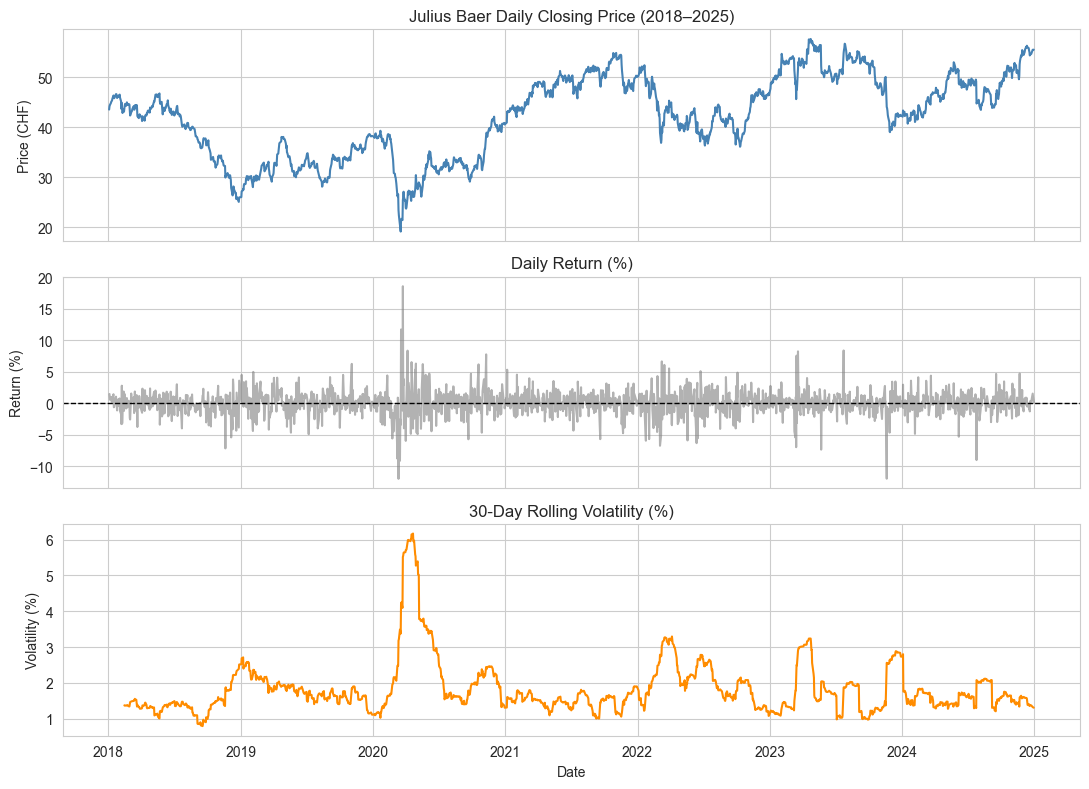

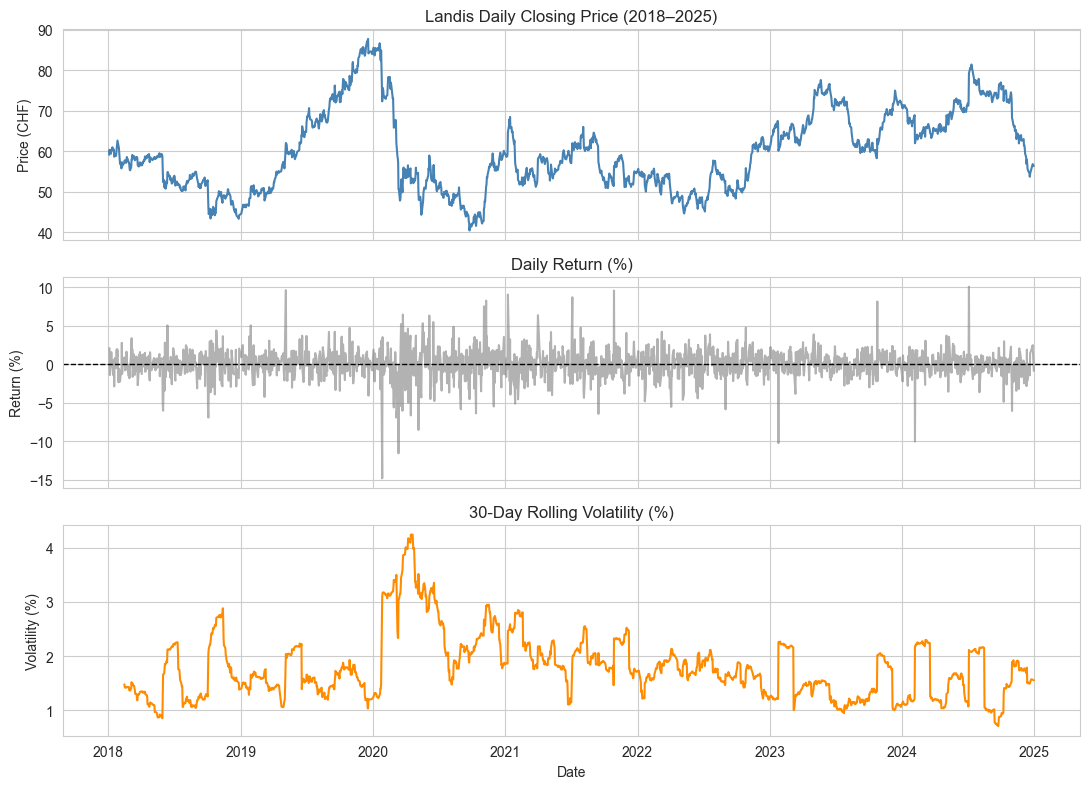

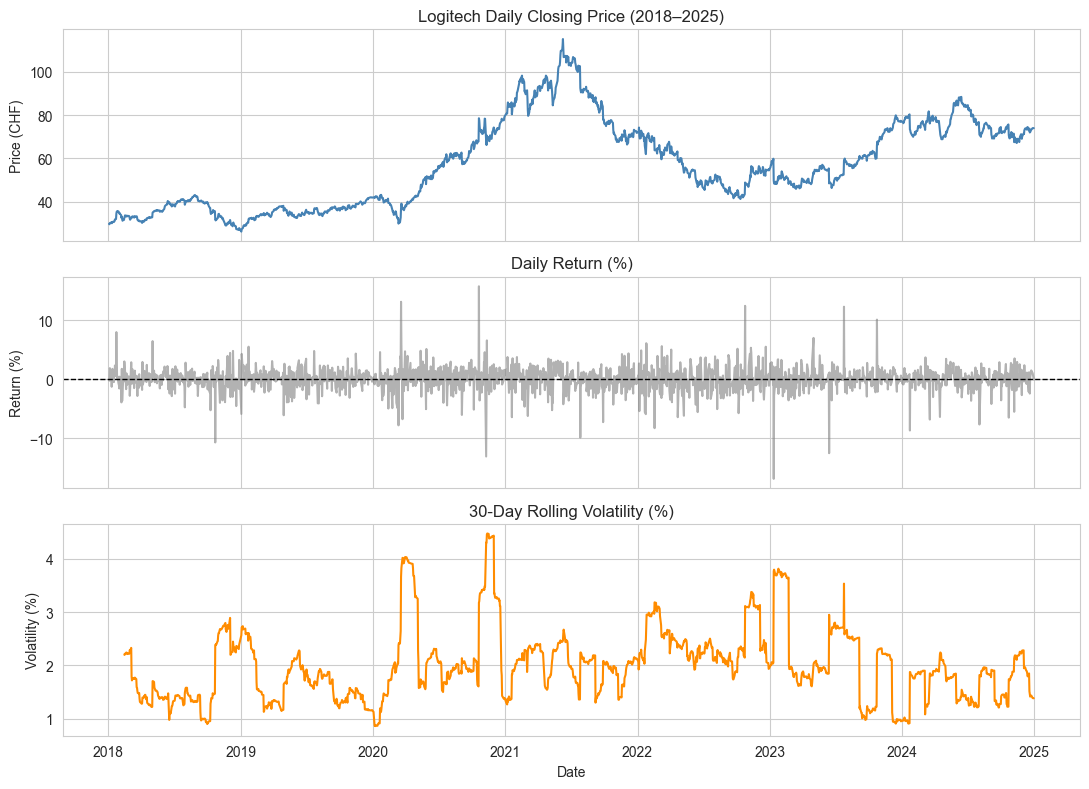

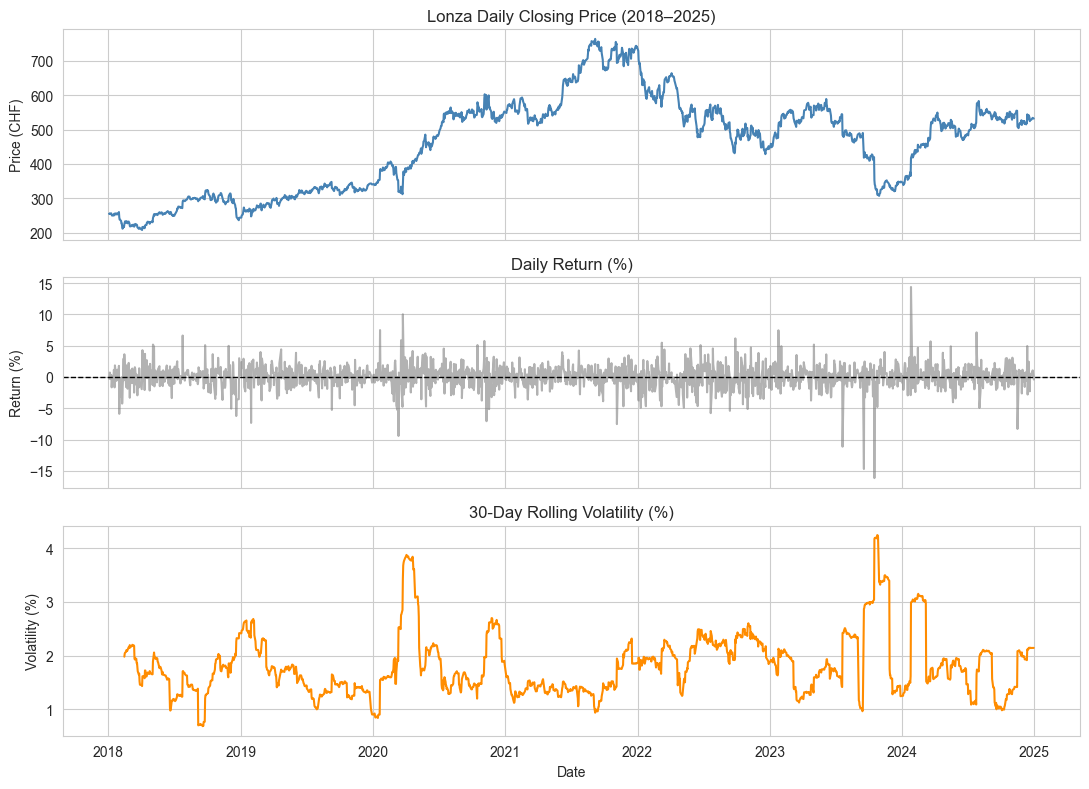

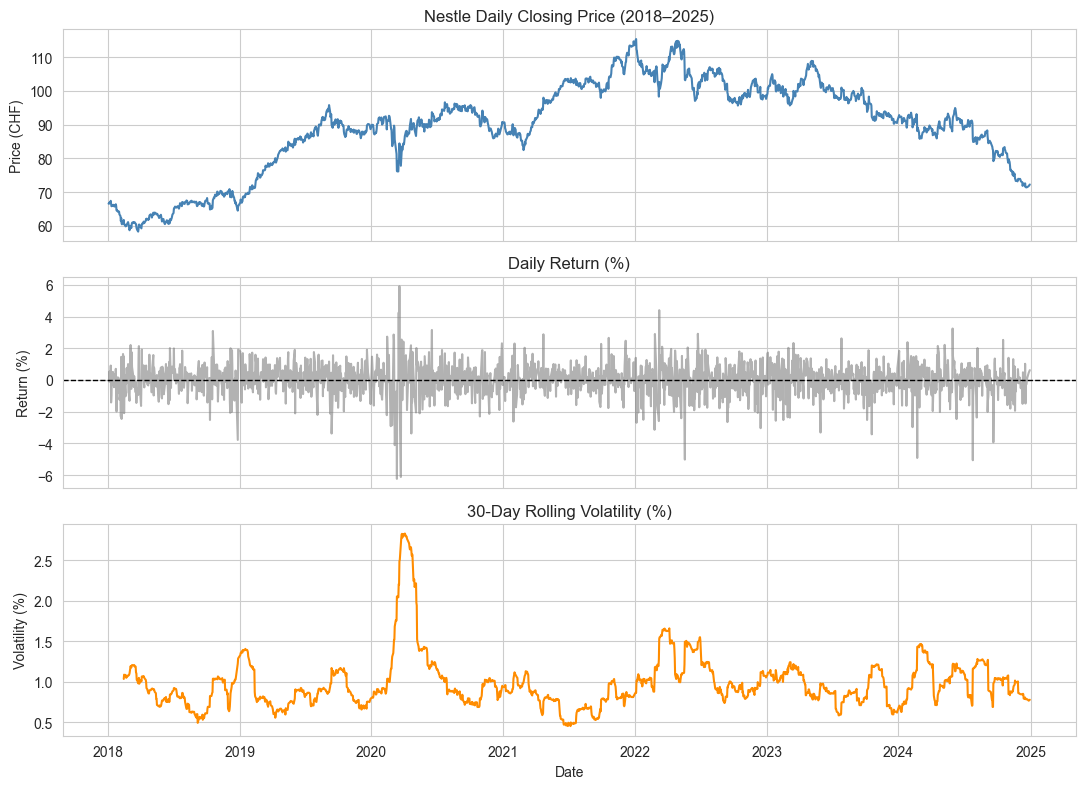

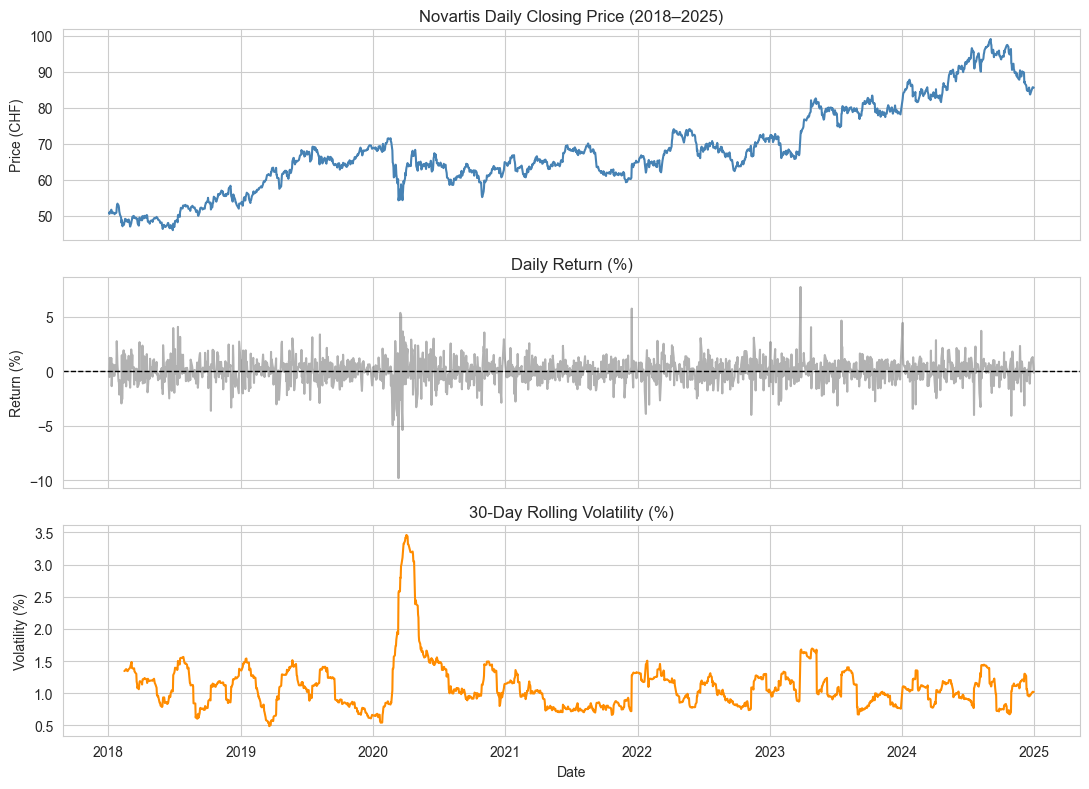

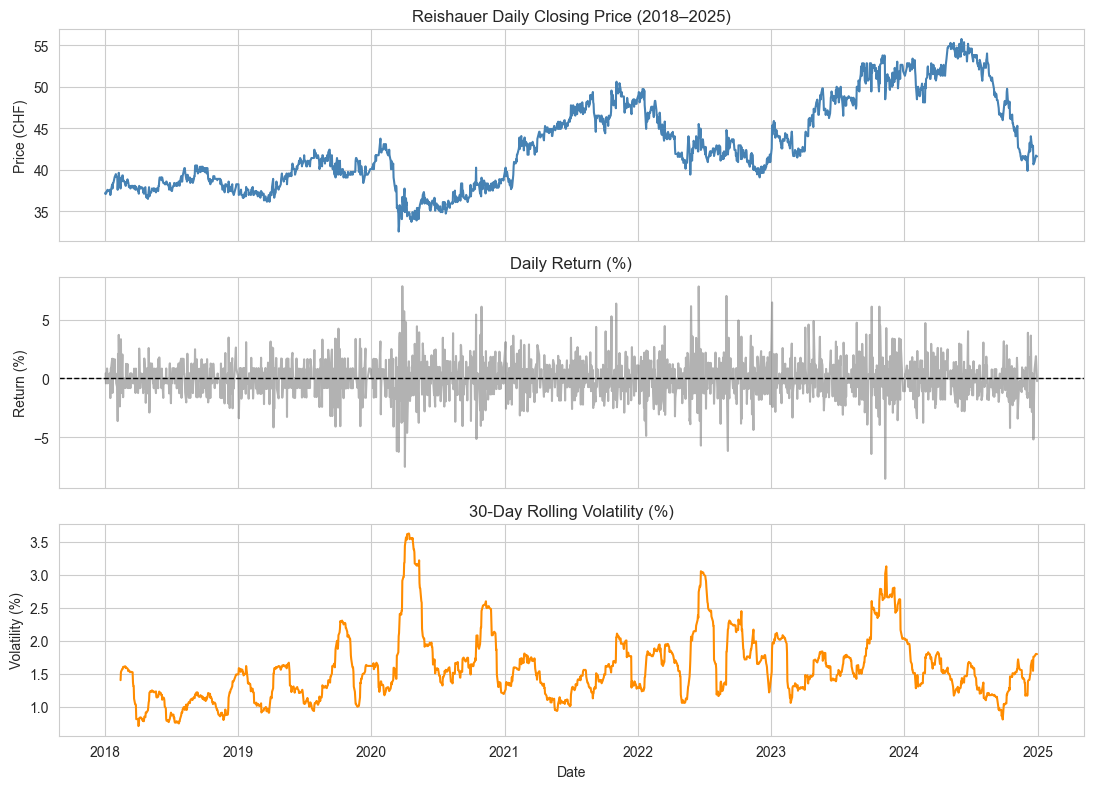

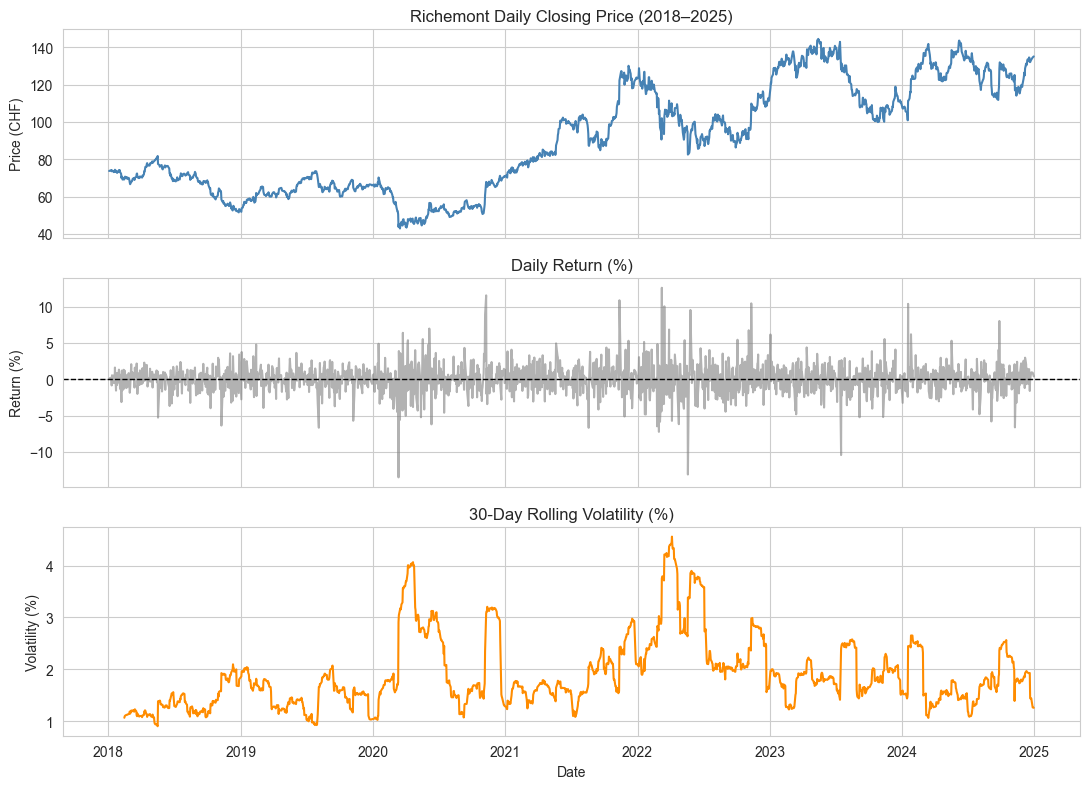

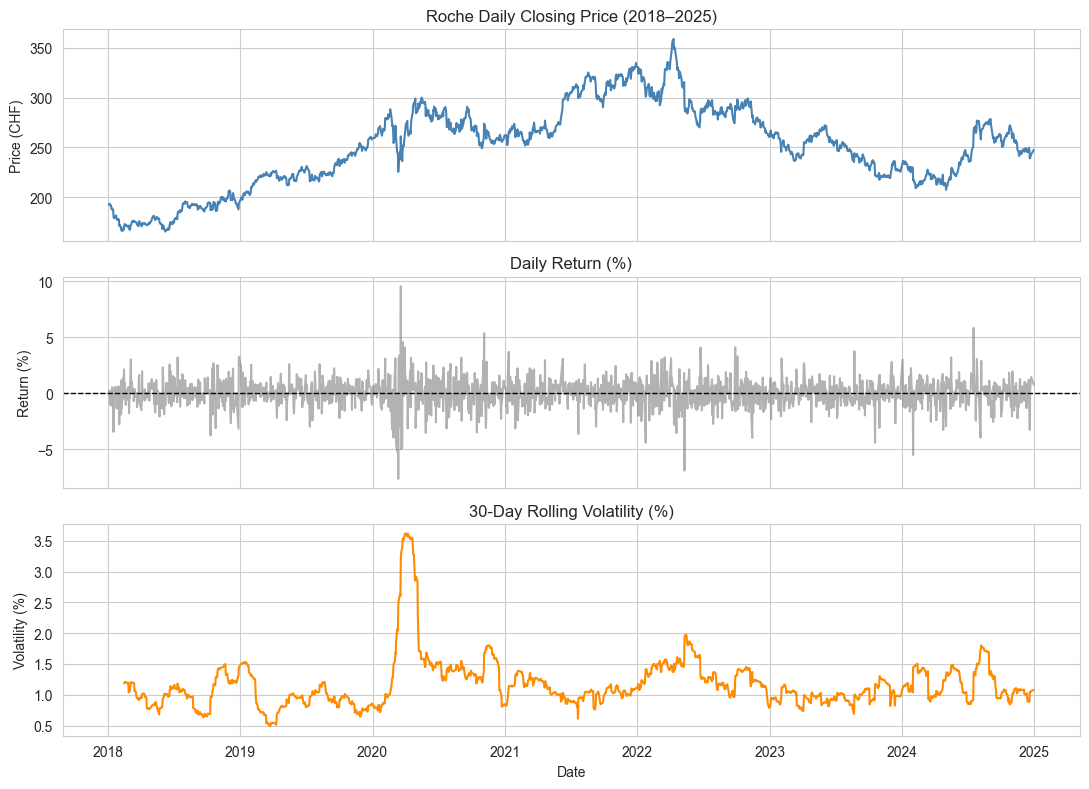

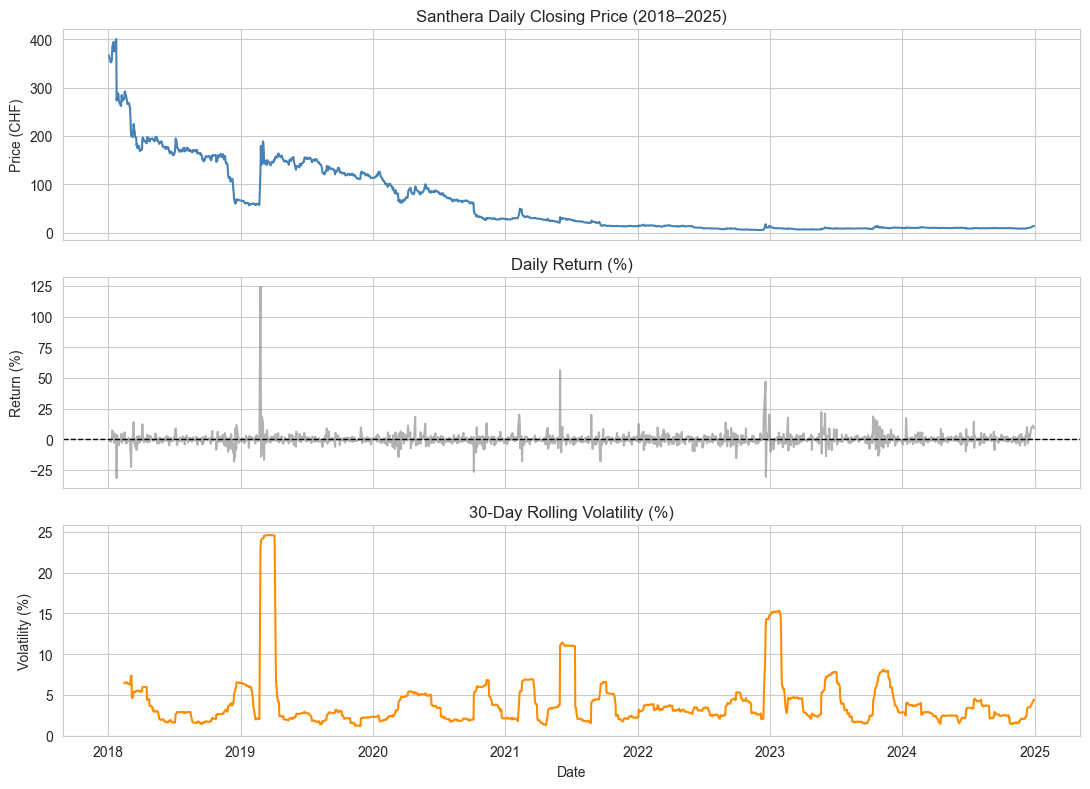

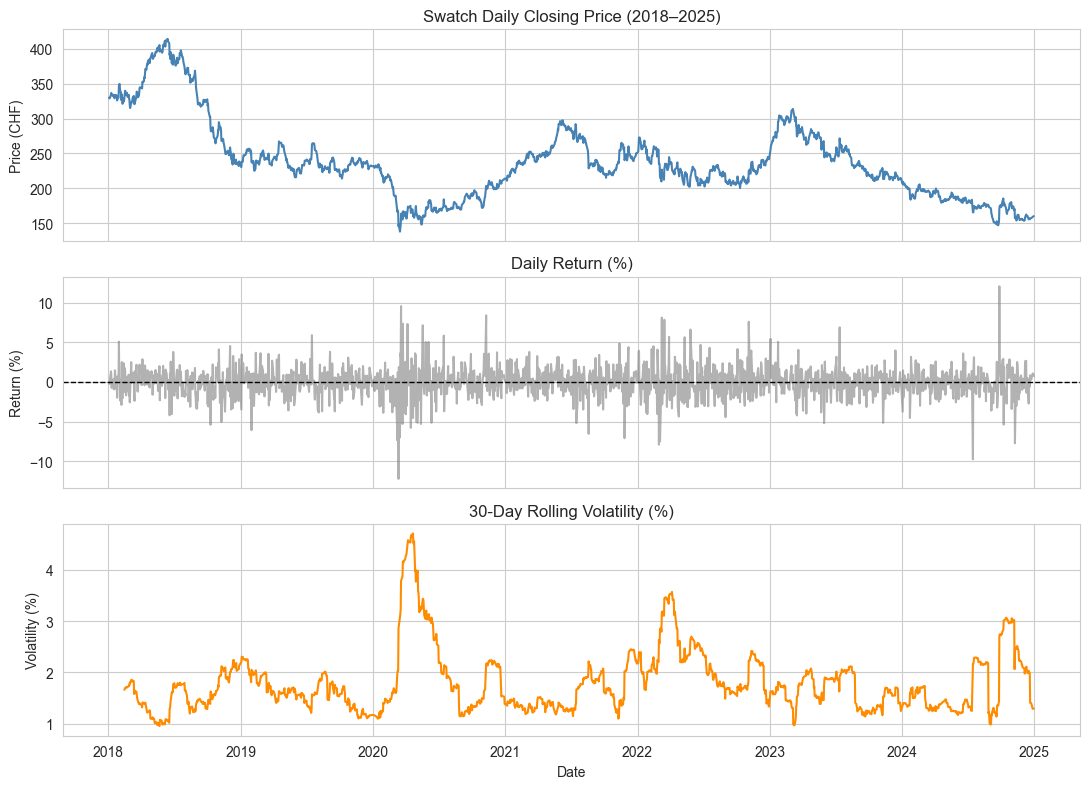

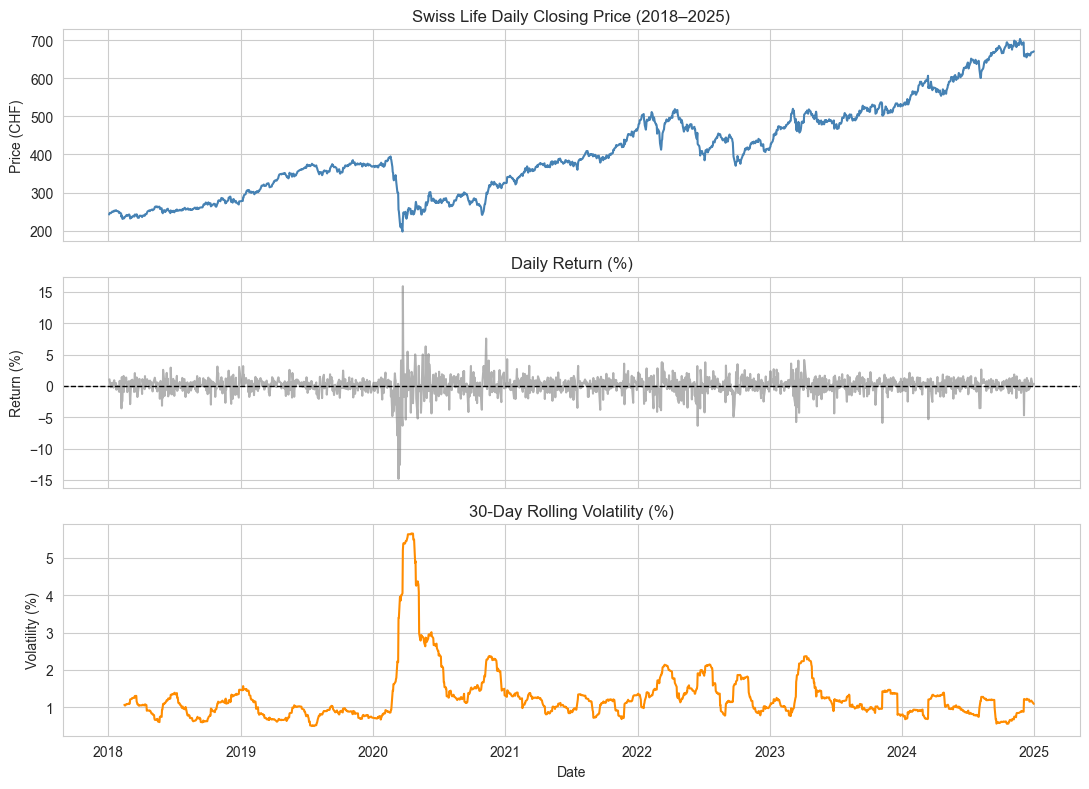

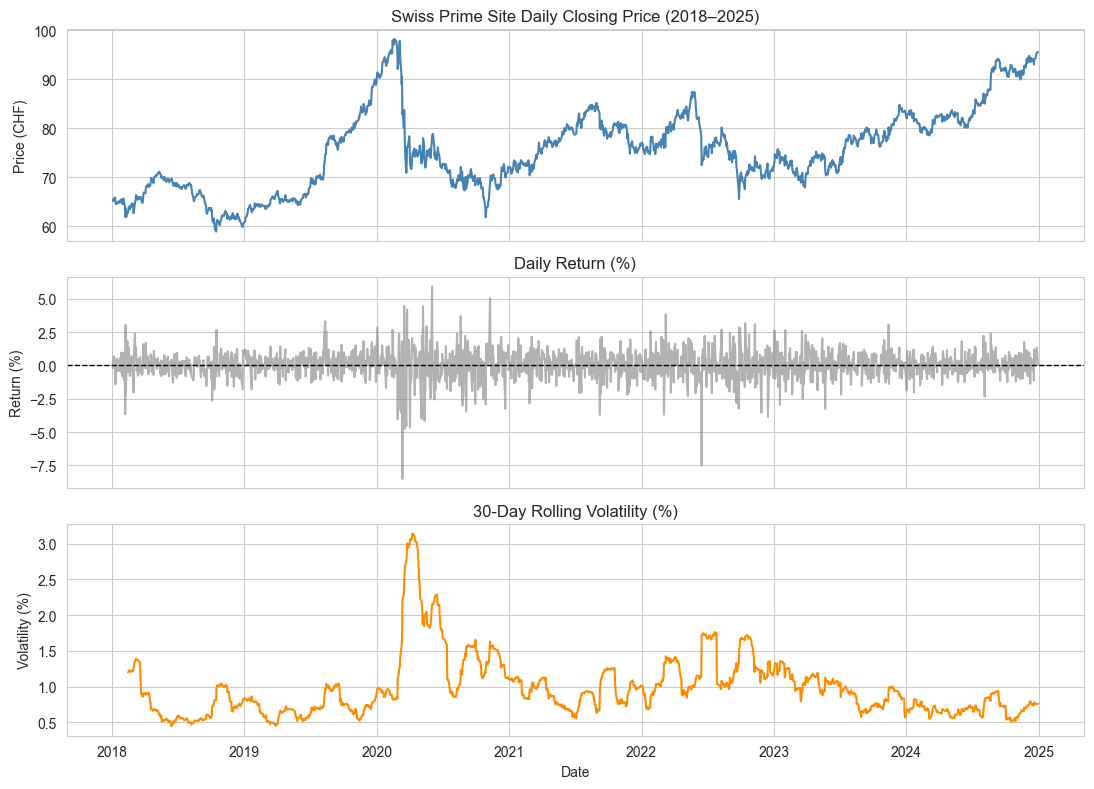

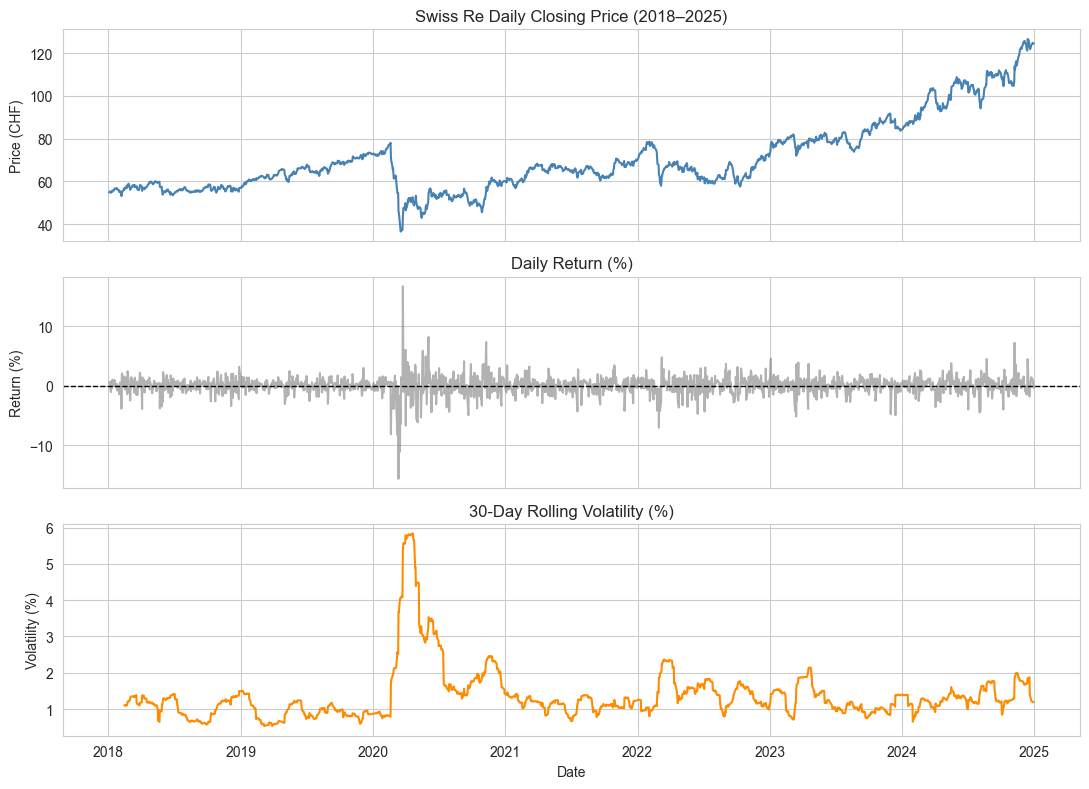

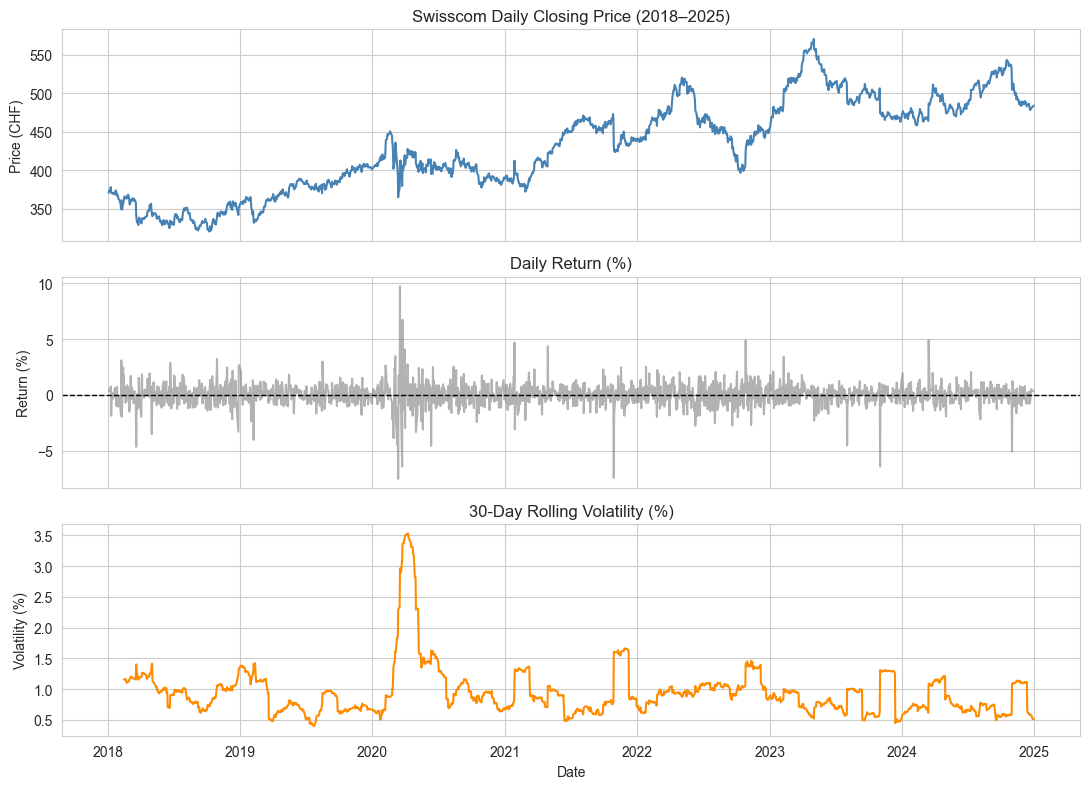

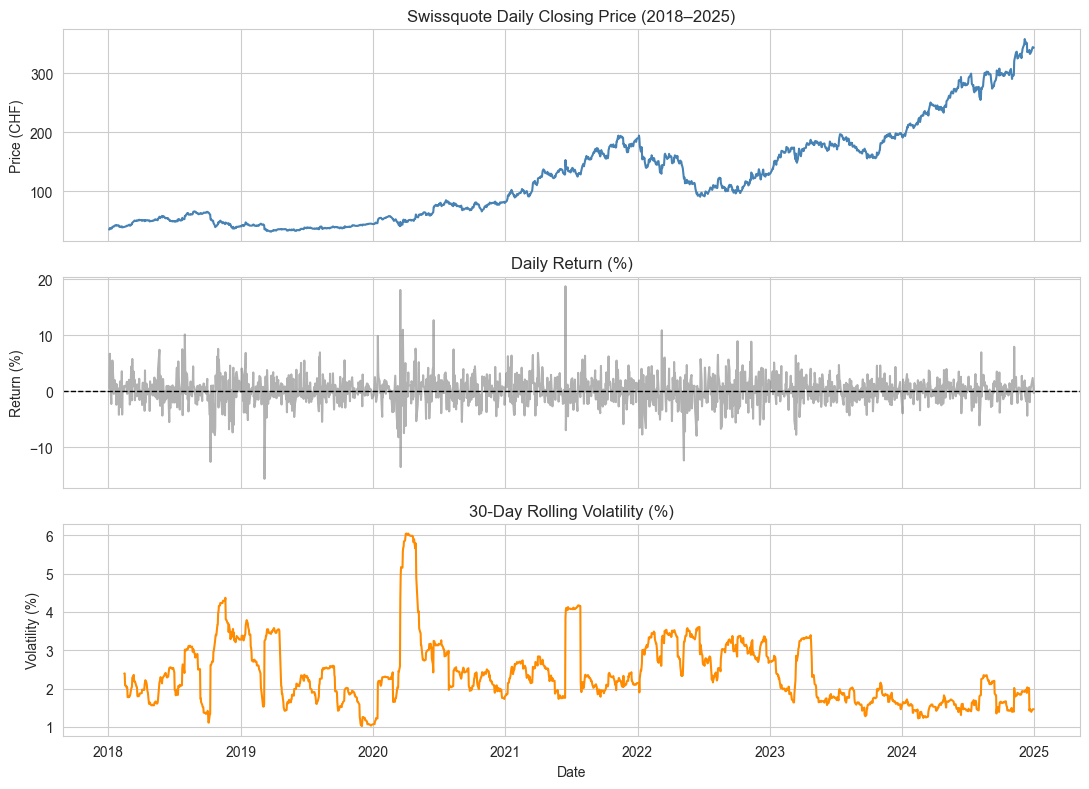

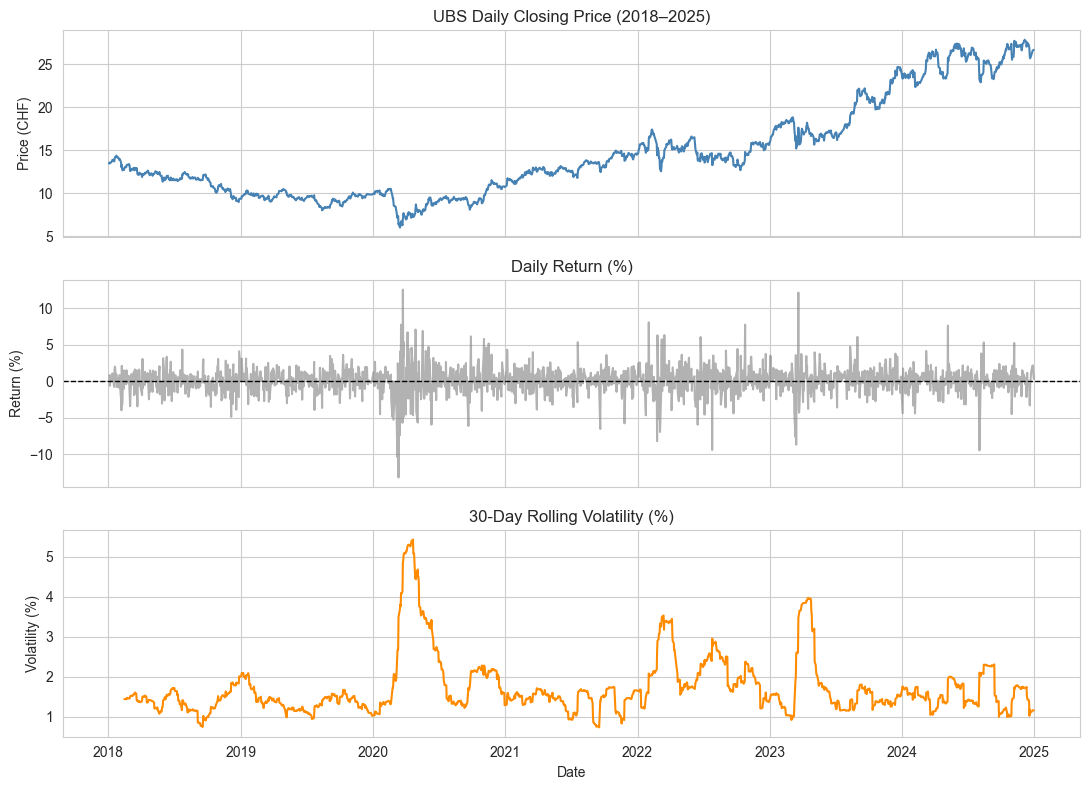

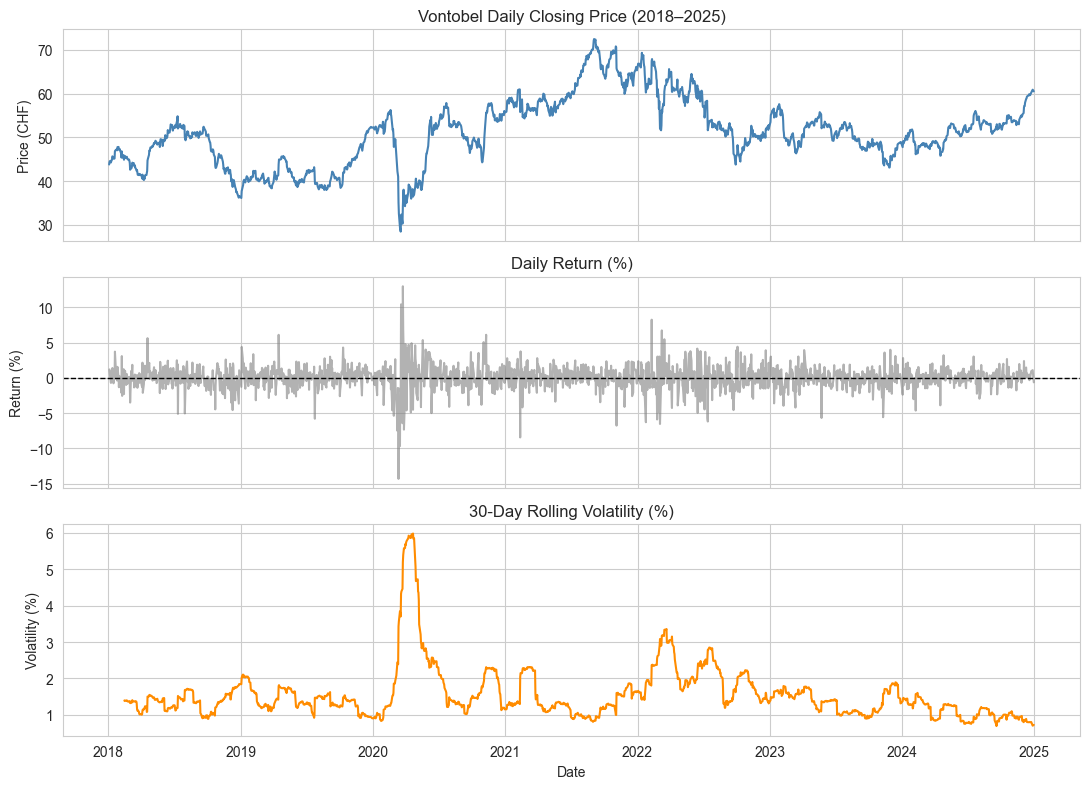

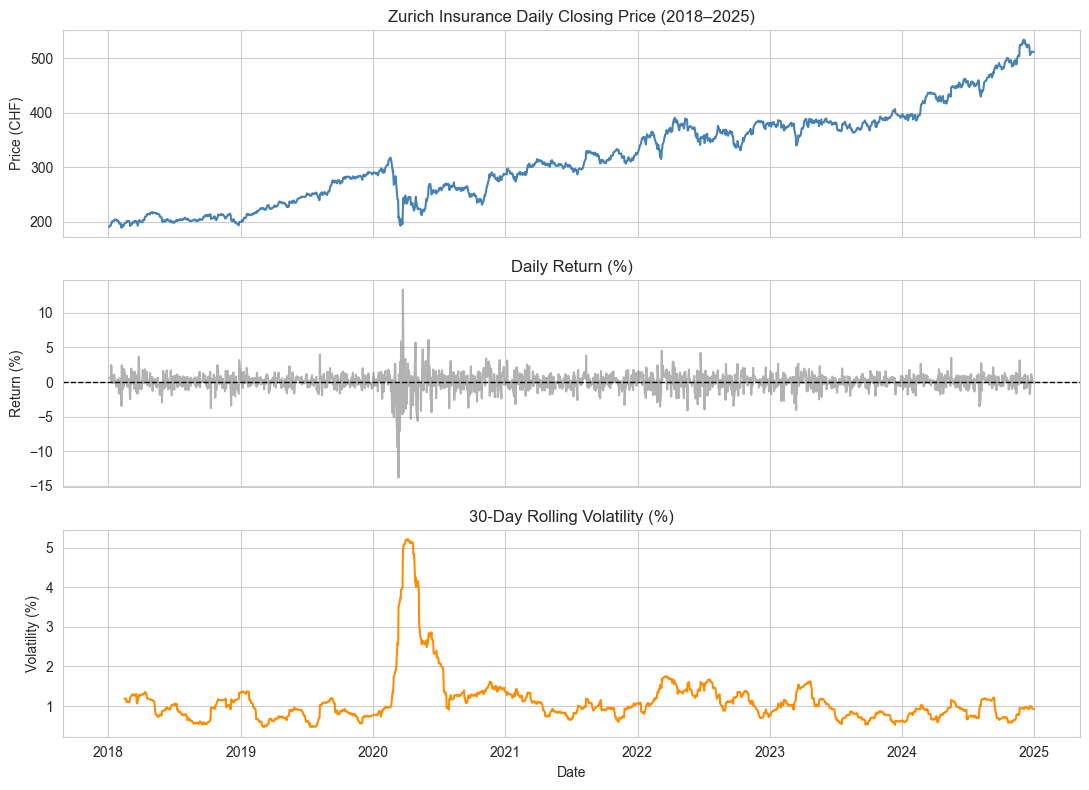

In [29]:
for ticker in market["ticker"].unique():
    s = market[market["ticker"] == ticker].sort_values("date").set_index("date")

    # compute metrics
    daily_price = s["close"]
    daily_return = s["return"] * 100                    # in %
    rolling_vol = s["return"].rolling(30).std() * 100   # 30-day rolling volatility %

    fig, axes = plt.subplots(3, 1, figsize=(11,8), sharex=True)

    # --- 1. Daily closing price
    axes[0].plot(s.index, daily_price, color="steelblue")
    axes[0].set_title(f"{ticker} Daily Closing Price (2018–2025)")
    axes[0].set_ylabel("Price (CHF)")

    # --- 2. Daily return (%)
    axes[1].plot(s.index, daily_return, color="gray", alpha=0.6)
    axes[1].axhline(0, ls="--", color="black", lw=1)
    axes[1].set_title("Daily Return (%)")
    axes[1].set_ylabel("Return (%)")

    # --- 3. 30-day rolling volatility (%)
    axes[2].plot(s.index, rolling_vol, color="darkorange")
    axes[2].set_title("30-Day Rolling Volatility (%)")
    axes[2].set_ylabel("Volatility (%)")
    axes[2].set_xlabel("Date")

    plt.tight_layout()
    fig.savefig(f"../../figures/market_exploration/{ticker}_metrics.png")
    plt.show()
    plt.close(fig)


## Dramatic Price Change Table


In [30]:
# Identify dates of dramatic changes for each ticker, including previous date
dramatic_changes = []

threshold = 0.05  # 5% as a threshold for dramatic change (adjust as desired)

for ticker in market["ticker"].unique():
    s = market[market["ticker"] == ticker].sort_values("date").reset_index(drop=True)
    s["prev_date"] = s["date"].shift(1)
    s["abs_return"] = s["return"].abs()
    # Find where abs_return is above threshold and grab previous date and return
    dramatic = s[s["abs_return"] > threshold][["date", "prev_date", "return"]]
    dramatic["ticker"] = ticker
    dramatic_changes.append(dramatic)

# After the loop, save the DataFrame as a table in the tables directory
import os
os.makedirs("../../tables", exist_ok=True)
dramatic_changes_df = pd.concat(dramatic_changes).sort_values(["ticker", "date"]).reset_index(drop=True)
dramatic_changes_df.to_csv("../../tables/dramatic_price_changes.csv", index=False)

dramatic_changes_df = pd.concat(dramatic_changes).sort_values(["ticker", "date"]).reset_index(drop=True)
# The table with columns: ticker, date, prev_date, return
dramatic_change_table = dramatic_changes_df[["ticker", "date", "prev_date", "return"]]



In [31]:
dramatic_change_table

ticker       date  prev_date    return
0                  ABB 2018-02-08 2018-02-07 -0.067125
1                  ABB 2019-04-17 2019-04-16  0.054202
2                  ABB 2020-03-09 2020-03-06 -0.074414
3                  ABB 2020-03-12 2020-03-11 -0.121161
4                  ABB 2020-03-23 2020-03-20 -0.067188
...                ...        ...        ...       ...
1014  Zurich Insurance 2020-03-25 2020-03-24  0.073242
1015  Zurich Insurance 2020-04-15 2020-04-14 -0.053275
1016  Zurich Insurance 2020-04-28 2020-04-27  0.057085
1017  Zurich Insurance 2020-05-04 2020-04-30 -0.056297
1018  Zurich Insurance 2020-06-03 2020-06-02  0.061017

[1019 rows x 4 columns]

In [32]:
# Let's investigate if dramatic changes in trading volume could indicate the presence of important news or events.
# We'll flag days where volume spikes significantly compared to recent history, and include the previous date for additional context.

volume_spike_changes = []

volume_threshold = 3  # 3x the 30-day rolling median volume as threshold

for ticker in market["ticker"].unique():
    s = market[market["ticker"] == ticker].sort_values("date").reset_index(drop=True)
    s["rolling_median_vol"] = s["volume"].rolling(window=30, min_periods=5).median()
    s["vol_spike"] = (s["volume"] / (s["rolling_median_vol"].replace(0, np.nan)))
    s["prev_date"] = s["date"].shift(1)
    spikes = s[s["vol_spike"] > volume_threshold][["ticker", "date", "prev_date", "volume", "rolling_median_vol", "vol_spike"]]
    spikes["ticker"] = ticker
    spikes = spikes[["ticker", "date", "prev_date", "volume", "rolling_median_vol", "vol_spike"]]
    volume_spike_changes.append(spikes)

# Concatenate all spikes into one DataFrame (do not save per-ticker CSVs)
volume_spike_df = pd.concat(volume_spike_changes).sort_values(["ticker", "date"]).reset_index(drop=True)

# Save the DataFrame as a CSV table in the tables directory
import os
os.makedirs("../../tables", exist_ok=True)
volume_spike_df.to_csv("../../tables/dramatic_volume_spikes.csv", index=False)

# Display some flagged days with dramatic volume spikes and their previous dates
volume_spike_df


ticker       date  prev_date      volume  rolling_median_vol  \
0                  ABB 2018-02-08 2018-02-07  17639303.0           5181034.0   
1                  ABB 2018-02-09 2018-02-08  16499267.0           5203719.5   
2                  ABB 2018-06-15 2018-06-14  18573352.0           5544902.5   
3                  ABB 2019-04-17 2019-04-16  25013746.0           4815935.5   
4                  ABB 2020-02-05 2020-02-04  22928654.0           7095493.5   
...                ...        ...        ...         ...                 ...   
1821  Zurich Insurance 2023-12-15 2023-12-14   1018100.0            282789.5   
1822  Zurich Insurance 2024-03-15 2024-03-14   1020368.0            261890.0   
1823  Zurich Insurance 2024-06-21 2024-06-20    999929.0            219980.0   
1824  Zurich Insurance 2024-09-20 2024-09-19    759041.0            234826.0   
1825  Zurich Insurance 2024-12-20 2024-12-19    975263.0            270249.5   

      vol_spike  
0      3.404591  
1      3.170668  
2      3.349626  
3      5.193954  
4      3.231439  
...         ...  
1821   3.600204  
1822   3.896170  
1823   4.545545  
1824   3.232355  
1825   3.608750  

[1826 rows x 6 columns]

In [33]:
# Find overlapping dates between dramatic price changes and dramatic volume spikes for each ticker
overlap = pd.merge(
    dramatic_change_table,
    volume_spike_df,
    on=["ticker", "date"],
    how="inner",
    suffixes=('_return', '_volume')
)

# Save overlap table to tables folder as CSV
import os
os.makedirs("../../tables", exist_ok=True)
overlap.to_csv("../../tables/dramatic_price_volume_overlap.csv", index=False)

overlap


ticker       date prev_date_return    return prev_date_volume  \
0                 ABB 2018-02-08       2018-02-07 -0.067125       2018-02-07   
1                 ABB 2019-04-17       2019-04-16  0.054202       2019-04-16   
2                 ABB 2020-03-09       2020-03-06 -0.074414       2020-03-06   
3                 ABB 2023-10-18       2023-10-17 -0.064605       2023-10-17   
4               Alcon 2020-02-26       2020-02-25  0.069519       2020-02-25   
..                ...        ...              ...       ...              ...   
333          Vontobel 2021-02-11       2021-02-10 -0.084525       2021-02-10   
334          Vontobel 2021-11-04       2021-11-03 -0.067747       2021-11-03   
335          Vontobel 2022-02-09       2022-02-08  0.082677       2022-02-08   
336  Zurich Insurance 2020-03-09       2020-03-06 -0.094181       2020-03-06   
337  Zurich Insurance 2020-03-12       2020-03-11 -0.137921       2020-03-11   

         volume  rolling_median_vol  vol_spike  
0    17639303.0           5181034.0   3.404591  
1    25013746.0           4815935.5   5.193954  
2    30450669.0           9015930.5   3.377429  
3     8385946.0           2559007.0   3.277031  
4     4992179.0           1162922.5   4.292787  
..          ...                 ...        ...  
333    196605.0             43176.0   4.553571  
334    124050.0             34713.0   3.573589  
335    110463.0             30086.5   3.671514  
336   2347172.0            637282.0   3.683098  
337   2550531.0            805640.5   3.165843  

[338 rows x 8 columns]

## Sector Normalized Close Price Analysis

### Sectors

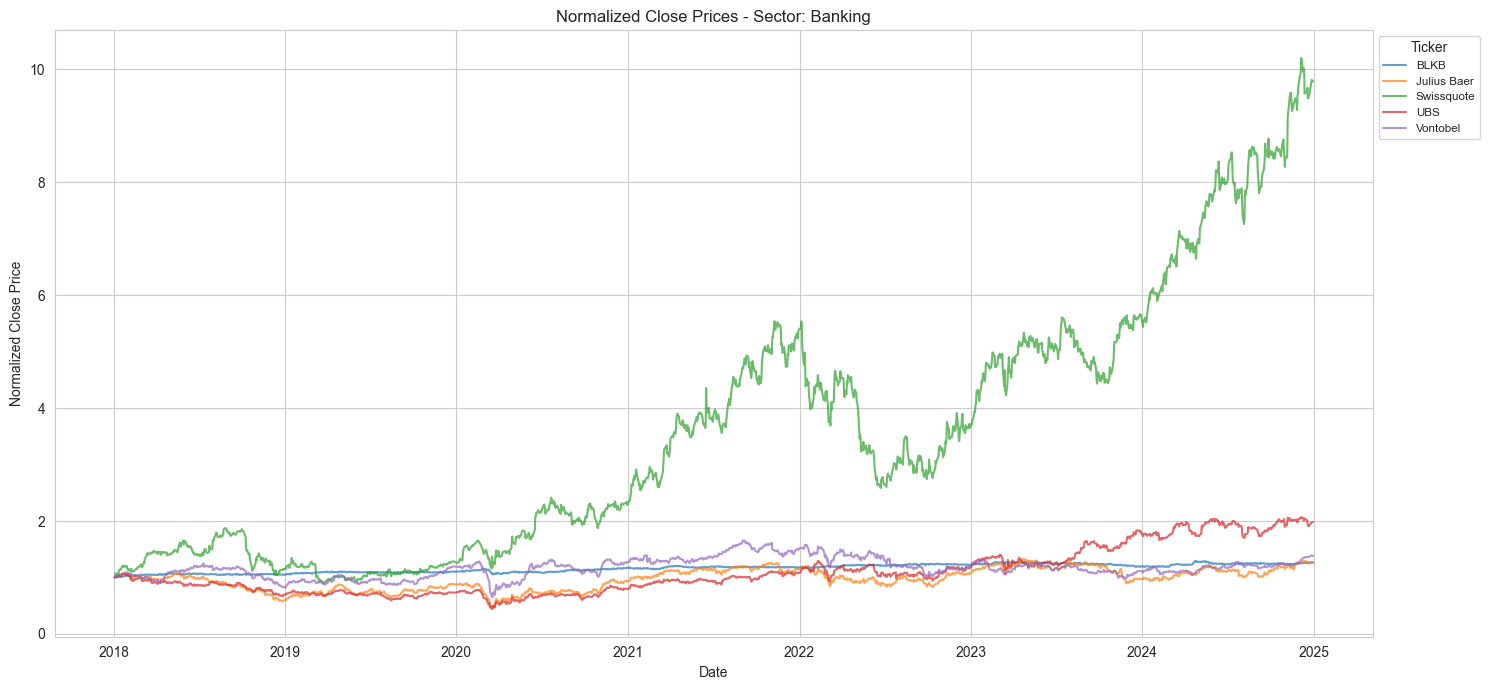

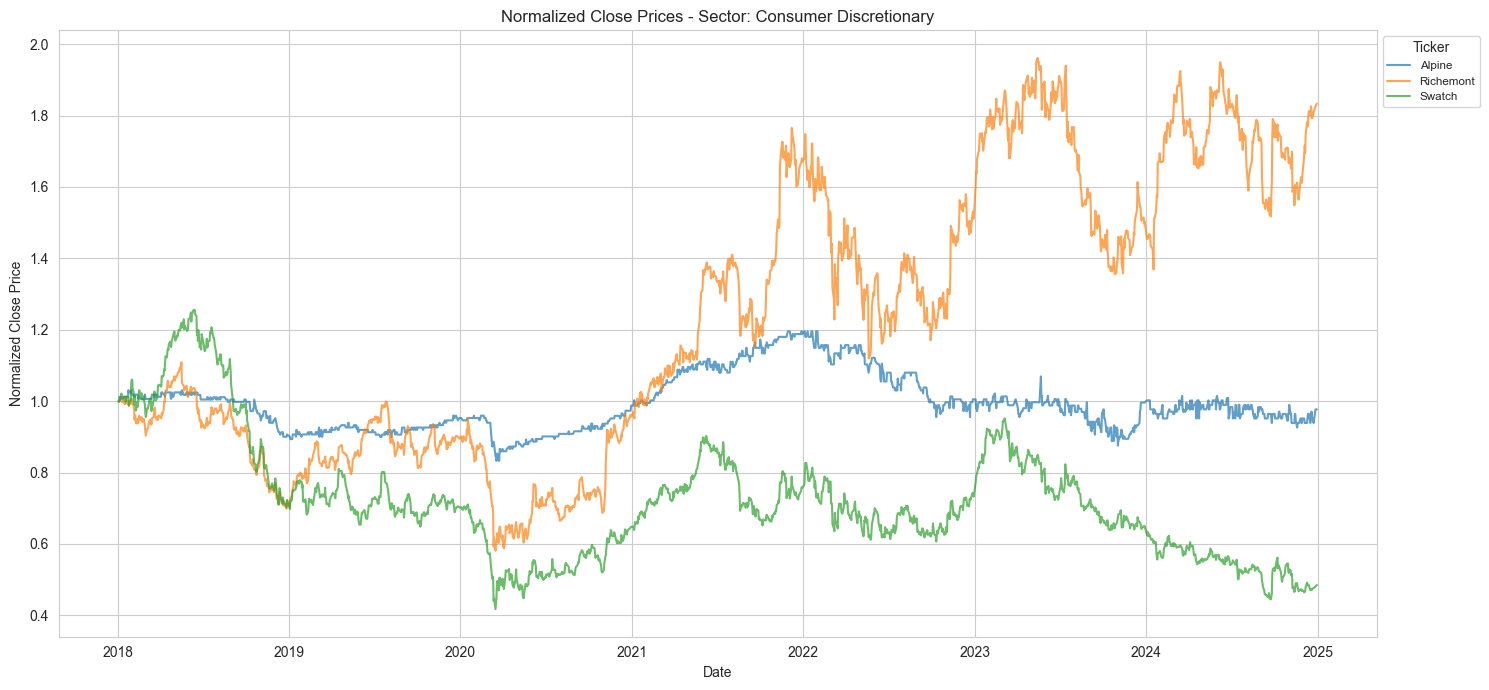

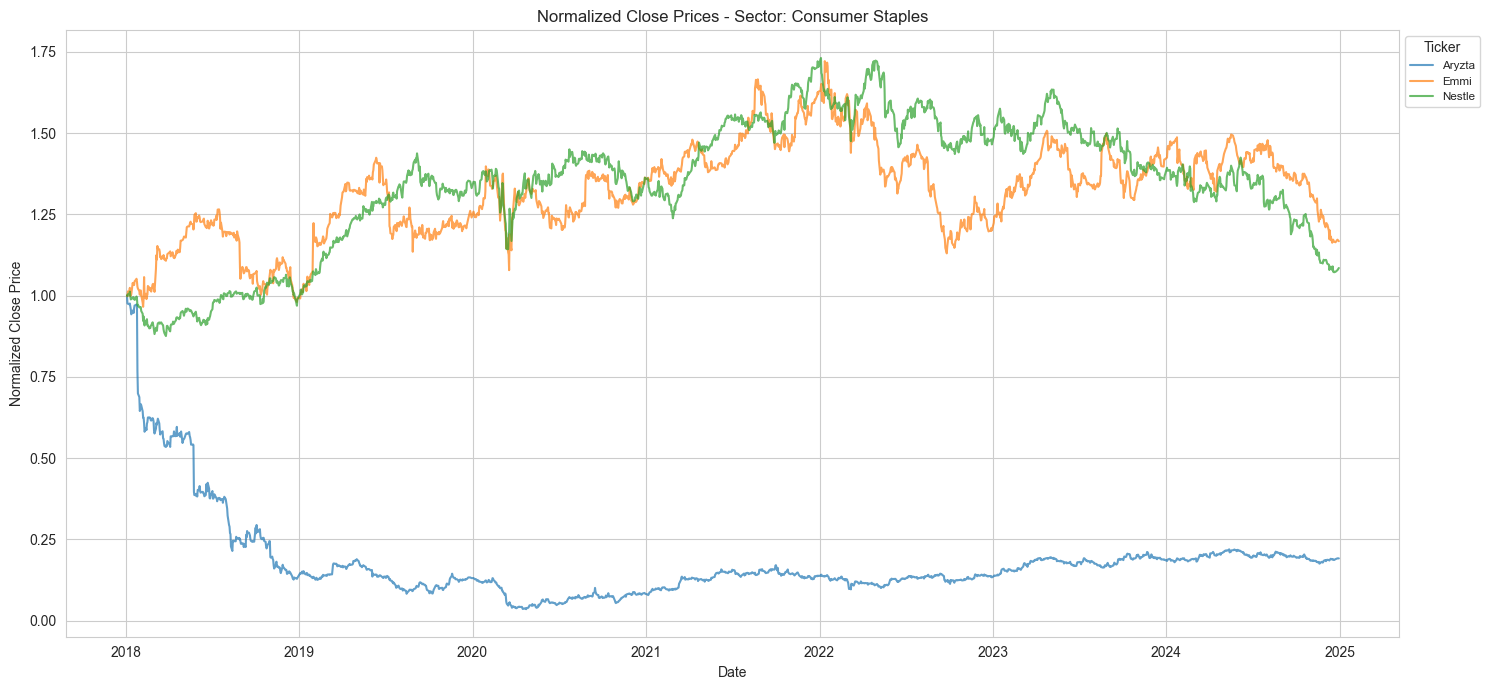

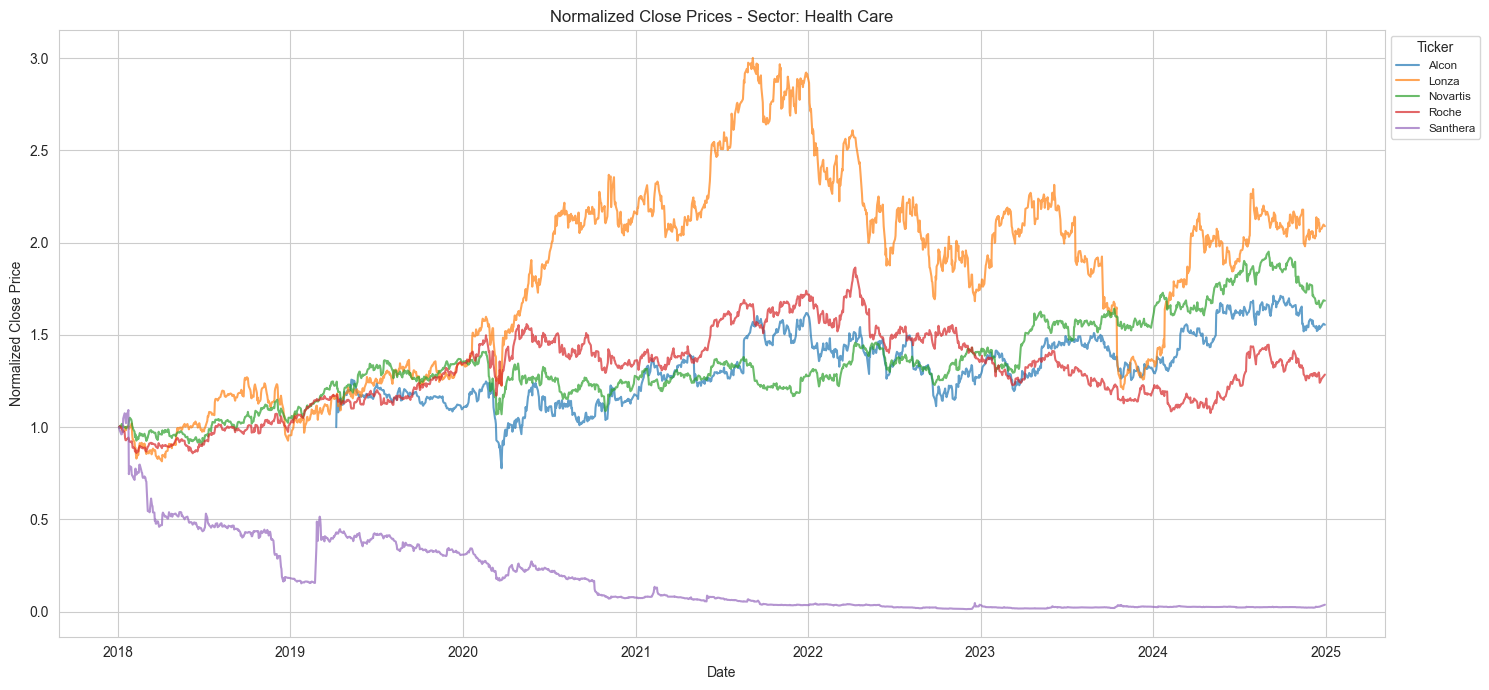

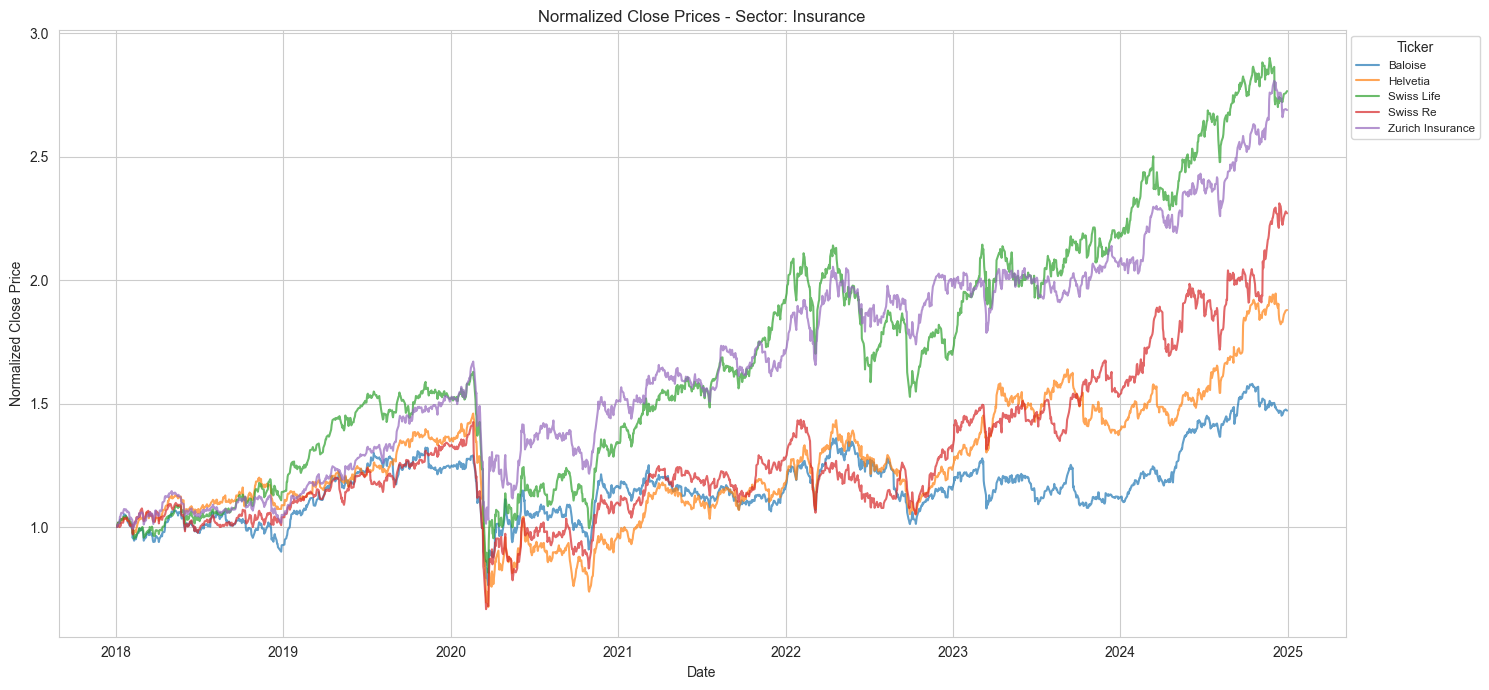

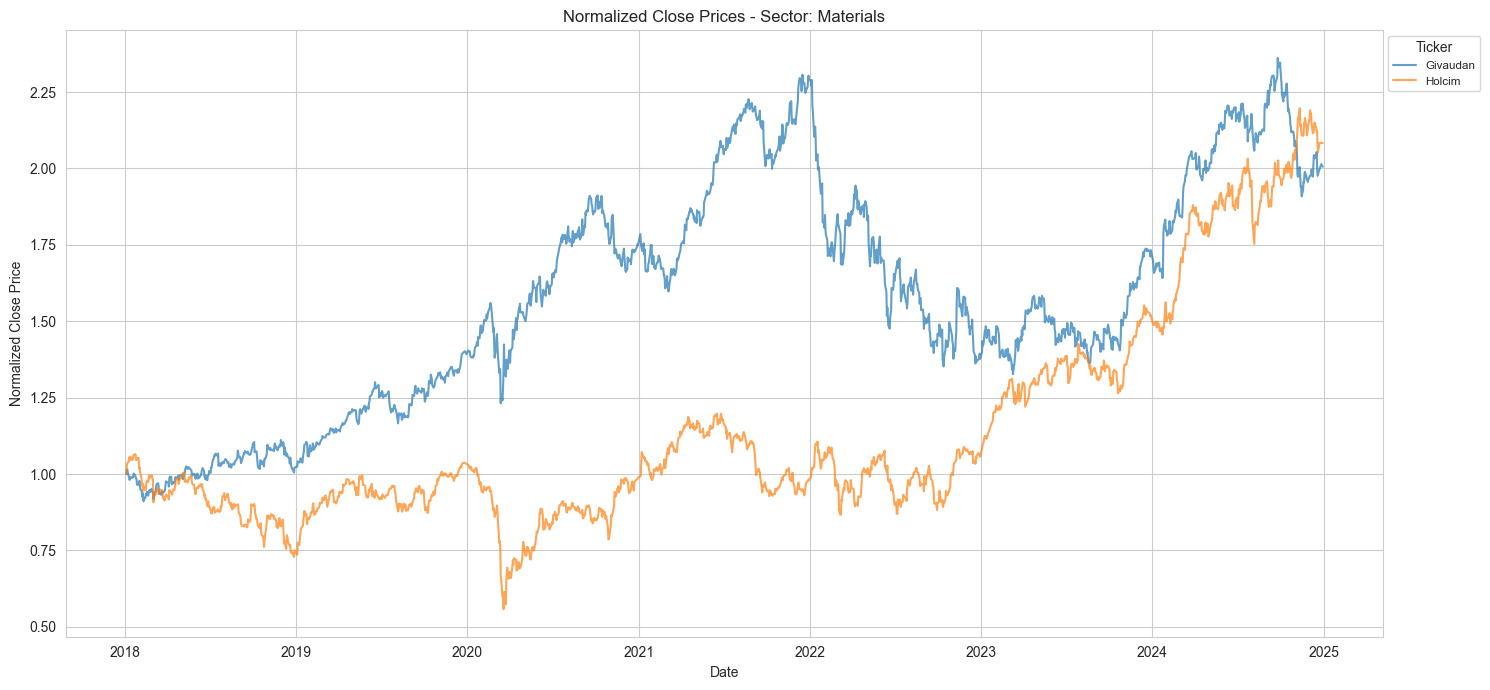

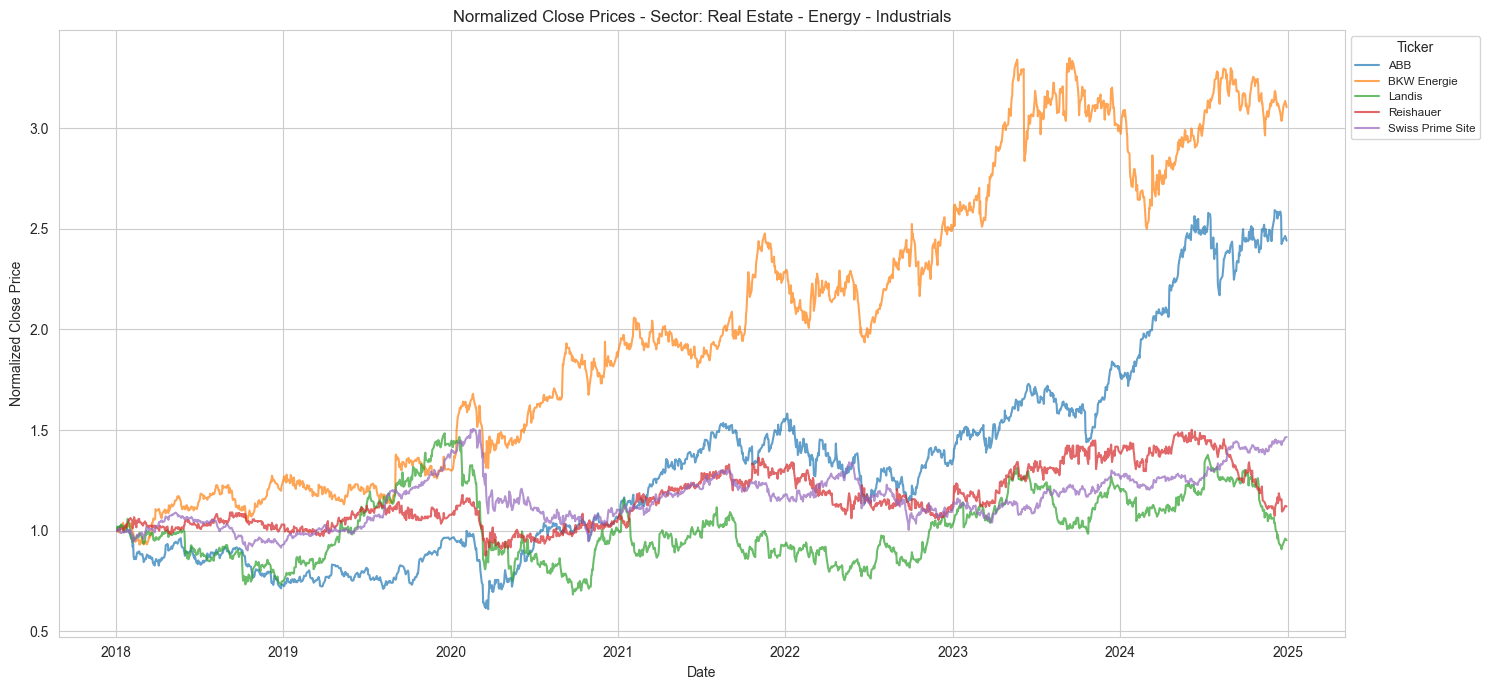

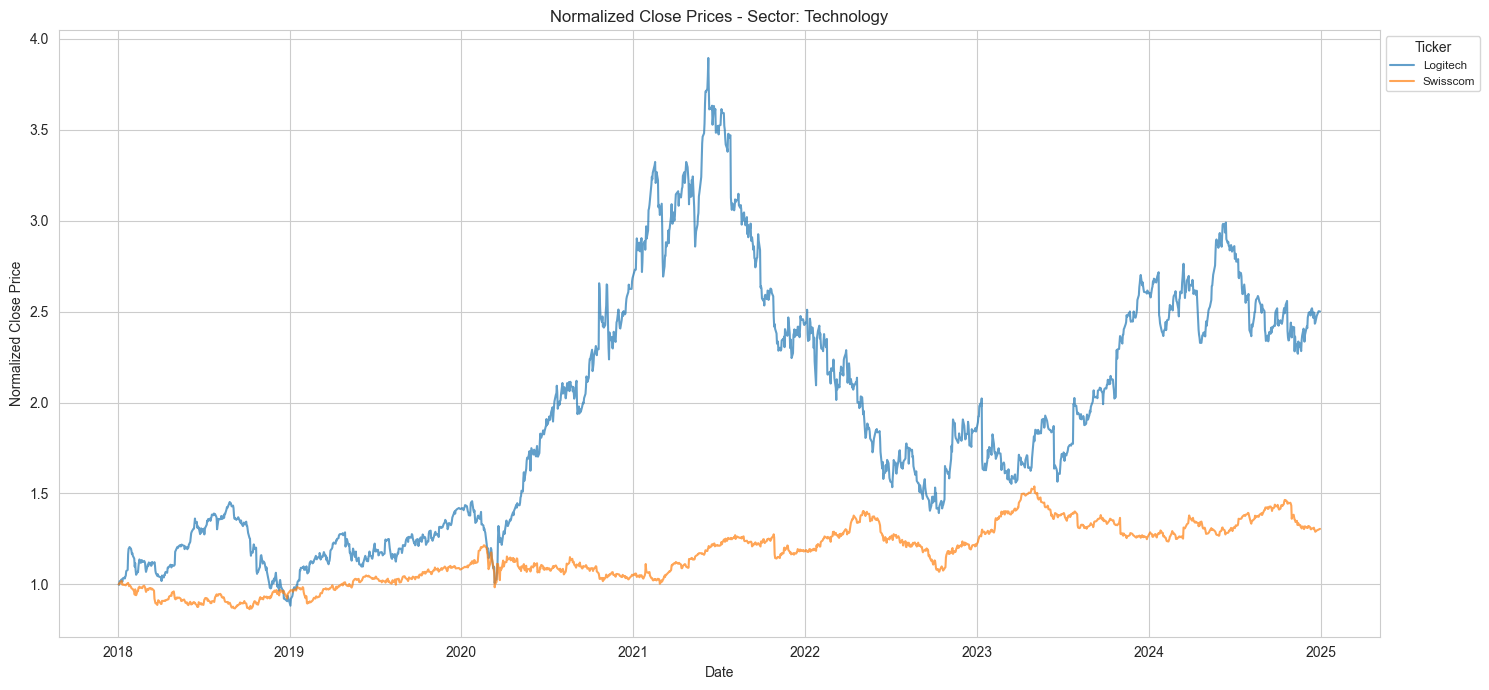

In [34]:

# List all unique sectors present in the market data using ticker_to_sector mapping, cleanly sorted
tickers = market["ticker"].unique()
sectors = sorted(set(ticker_to_sector.get(t, "Other") for t in tickers))

# Ensure figures output directory exists
import os
figures_dir = "../../figures/market_exploration"
os.makedirs(figures_dir, exist_ok=True)

for sector in sectors:
    sector_tickers = [t for t in tickers if ticker_to_sector.get(t, "Other") == sector]
    if not sector_tickers:
        continue
    plt.figure(figsize=(15, 7))
    for ticker in sector_tickers:
        group = market[market["ticker"] == ticker].sort_values("date")
        if group.empty or group["close"].iloc[0] == 0 or group["close"].isnull().all():
            continue
        norm_close = group["close"] / group["close"].iloc[0]
        plt.plot(group["date"], norm_close, label=ticker, alpha=0.7)
    plt.title(f"Normalized Close Prices - Sector: {sector}")
    plt.xlabel("Date")
    plt.ylabel("Normalized Close Price")
    plt.legend(title="Ticker", bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    # Save the figure; sanitize the filename further if needed
    safe_sector = sector.replace(' ', '_').replace('-', '').replace('&', 'and').replace('/', '').replace(',', '')
    out_filename = f"sector_normalized_close_{safe_sector}.png"
    out_path = os.path.join(figures_dir, out_filename)
    plt.savefig(out_path, dpi=150)
    plt.show()
    plt.close()



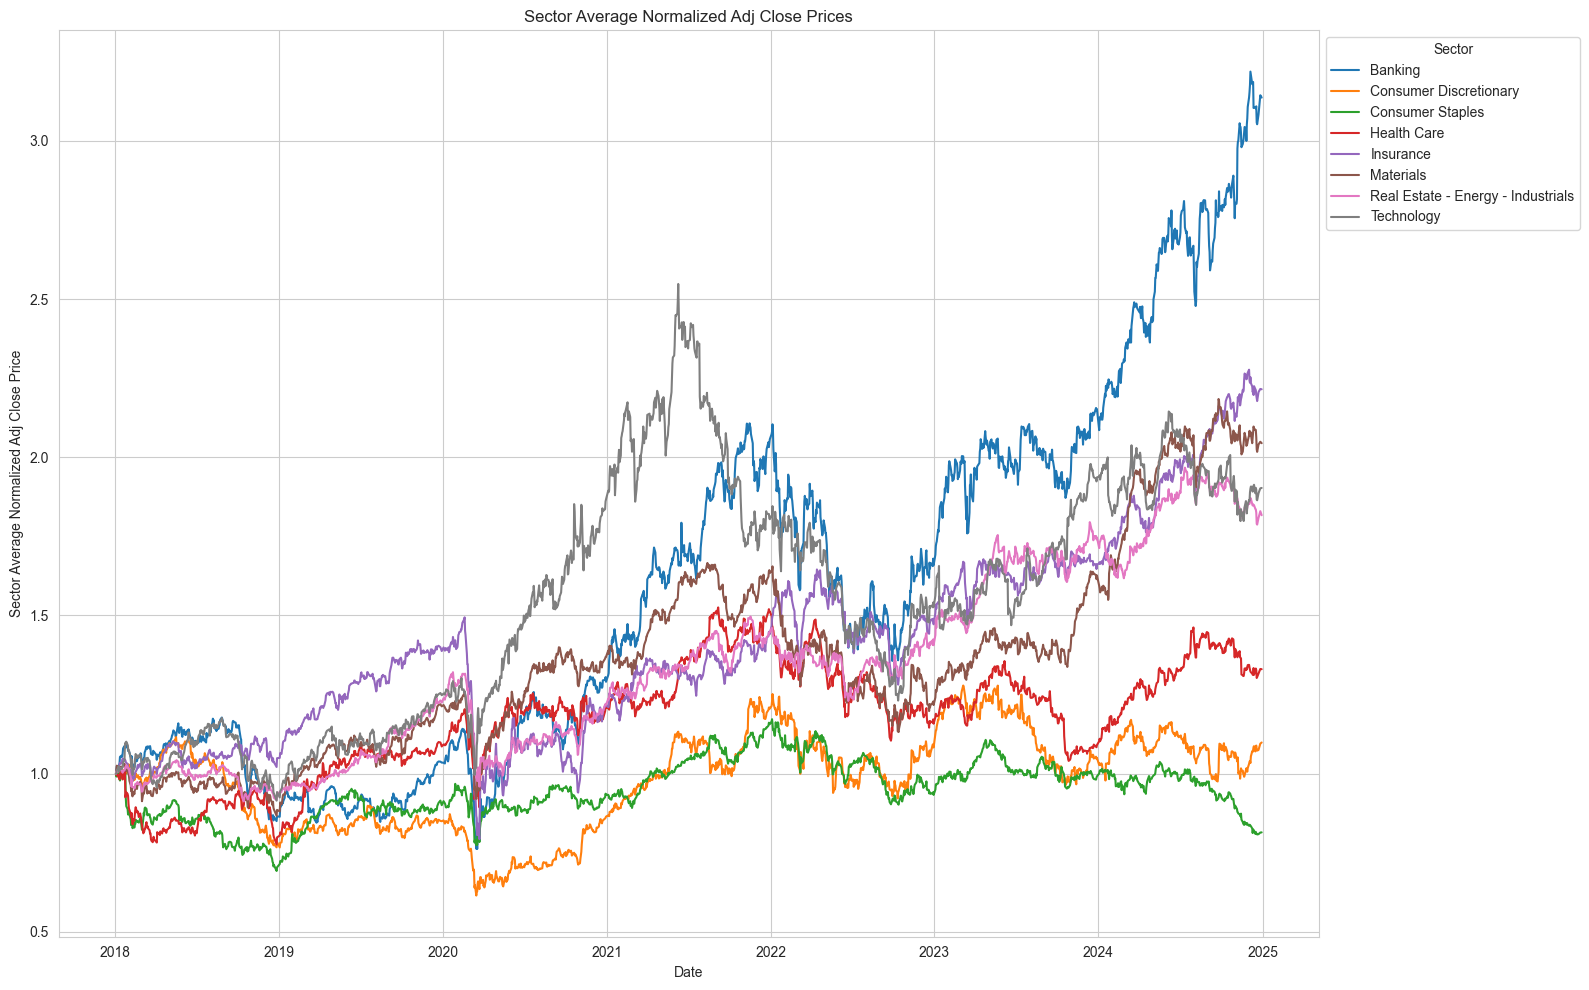


Sector Total Return Over Period (Adj Close):
                                    Total Return
Banking                                 2.136601
Insurance                               1.214748
Materials                               1.044375
Technology                              0.902958
Real Estate - Energy - Industrials      0.816742
Health Care                             0.330148
Consumer Discretionary                  0.098494
Consumer Staples                       -0.185514


In [35]:
# For each sector, plot sector average normalized close price vs all others for comparison

sector_avg_norm_close = {}

# Compute sector average normalized *adj close* price DataFrame, using 'adj close' column as seen in the image
for sector in sectors:
    sector_tickers = [t for t in tickers if ticker_to_sector.get(t, "Other") == sector]
    data = []
    for ticker in sector_tickers:
        group = market[market["ticker"] == ticker].sort_values("date")
        # Use adjusted close for normalization (more robust to splits/div adjustments)
        if group["adj close"].iloc[0] == 0 or group["adj close"].isnull().all():
            continue  # skip if bad data
        norm_adj_close = group.set_index("date")["adj close"] / group.set_index("date")["adj close"].iloc[0]
        norm_adj_close = norm_adj_close.rename(ticker)
        data.append(norm_adj_close)
    if data:
        sector_df = pd.concat(data, axis=1)
        avg_norm_close = sector_df.mean(axis=1)
        sector_avg_norm_close[sector] = avg_norm_close

# Union of all dates
all_dates = sorted(set().union(*[arr.index for arr in sector_avg_norm_close.values()]))

# Build DataFrame of all sector normalized (adj close) values
sector_norm_df = pd.DataFrame(index=all_dates)
for sector, normclose in sector_avg_norm_close.items():
    # Forward-fill for non-trading days/missing
    sector_norm_df[sector] = normclose.reindex(sector_norm_df.index).ffill()

# Plot all sectors together
plt.figure(figsize=(16, 10))
for sector in sectors:
    plt.plot(sector_norm_df.index, sector_norm_df[sector], label=sector)
plt.title("Sector Average Normalized Adj Close Prices")
fig = plt.gcf()
fig.savefig("../../figures/market_exploration/sector_average_normalized_adj_close_prices.png")
plt.xlabel("Date")
plt.ylabel("Sector Average Normalized Adj Close Price")
plt.legend(title="Sector", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print out final returns for each sector for comparison (using adj close)
final_returns = {}
for sector, normclose in sector_avg_norm_close.items():
    if normclose.iloc[0] != 0:
        total_return = normclose.iloc[-1] / normclose.iloc[0] - 1
        final_returns[sector] = total_return
    else:
        final_returns[sector] = float('nan')
final_returns_df = pd.DataFrame.from_dict(final_returns, orient='index', columns=['Total Return'])
print("\nSector Total Return Over Period (Adj Close):")
print(final_returns_df.sort_values("Total Return", ascending=False))


### Small, Mid, Large Cap  

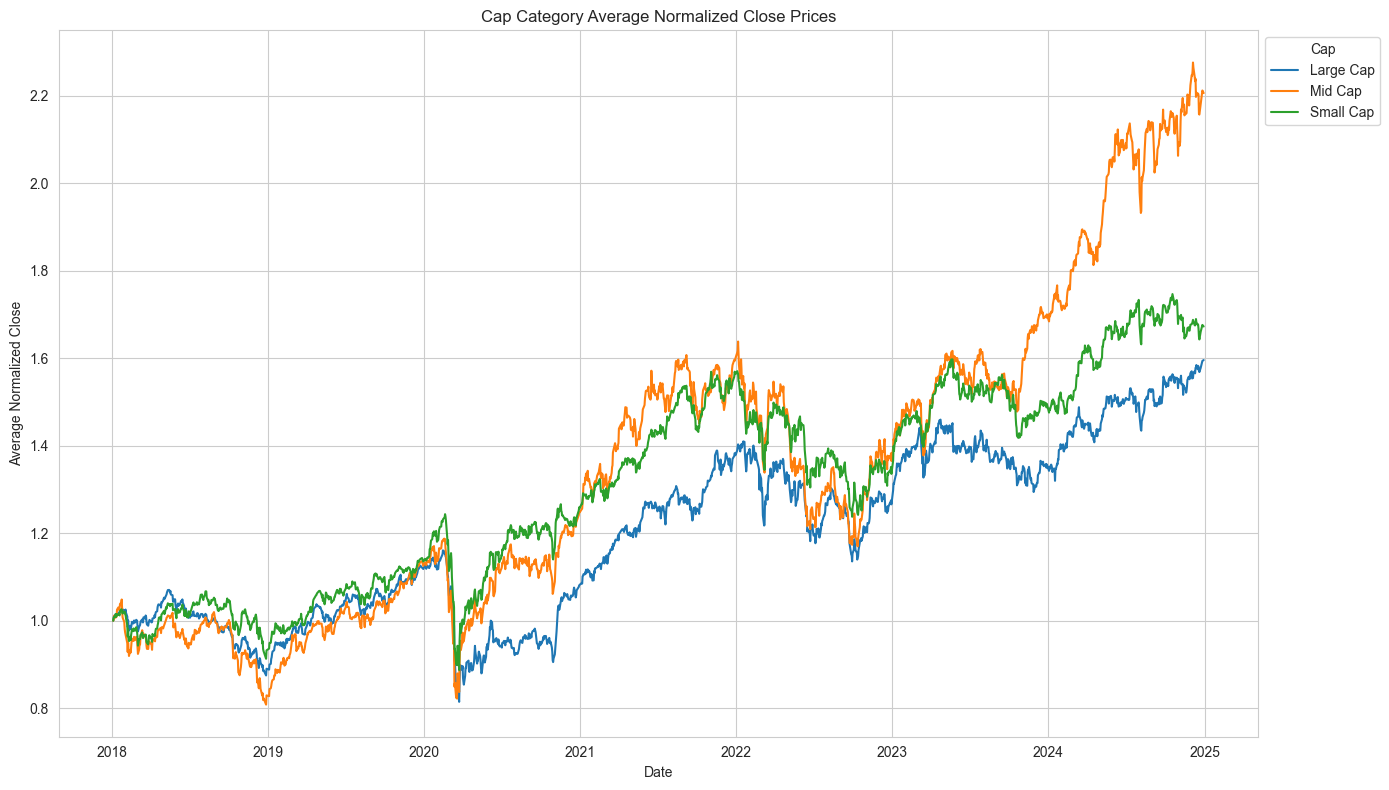


Cap Total Return Over Period:
           Total Return
Mid Cap        1.206353
Small Cap      0.672732
Large Cap      0.595962


In [36]:
# Compute cap-level average normalized close prices and plot
caps = sorted(market["cap"].dropna().unique())

cap_avg_norm_close = {}
for cap in caps:
    tickers_cap = market.loc[market["cap"] == cap, "ticker"].unique()
    data = []
    for t in tickers_cap:
        g = market[market["ticker"] == t].sort_values("date")
        norm_close = g.set_index("date")["close"] / g.set_index("date")["close"].iloc[0]
        norm_close = norm_close.rename(t)
        data.append(norm_close)
    if data:
        cap_df = pd.concat(data, axis=1)
        cap_avg_norm_close[cap] = cap_df.mean(axis=1)

# Build aligned DataFrame
all_dates_cap = sorted(set().union(*[s.index for s in cap_avg_norm_close.values()]))
cap_norm_df = pd.DataFrame(index=all_dates_cap)
for cap, series in cap_avg_norm_close.items():
    cap_norm_df[cap] = series.reindex(cap_norm_df.index).ffill()

# Plot all caps together
plt.figure(figsize=(14, 8))
for cap in caps:
    if cap in cap_norm_df.columns:
        plt.plot(cap_norm_df.index, cap_norm_df[cap], label=cap)
plt.title("Cap Category Average Normalized Close Prices")
plt.xlabel("Date")
plt.ylabel("Average Normalized Close")
plt.legend(title="Cap", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
os.makedirs("../../figures/market_exploration", exist_ok=True)
plt.savefig("../../figures/market_exploration/cap_average_normalized_close_prices.png", dpi=150)
plt.show()

# Save cap average series and report total returns
os.makedirs("../../tables", exist_ok=True)
cap_norm_df.to_csv("../../tables/cap_average_normalized_close_prices.csv")
cap_final_returns = {
    cap: s.iloc[-1] / s.iloc[0] - 1 for cap, s in cap_avg_norm_close.items()
}
cap_final_returns_df = pd.DataFrame.from_dict(cap_final_returns, orient='index', columns=['Total Return']).sort_values('Total Return', ascending=False)
print("\nCap Total Return Over Period:")
print(cap_final_returns_df)




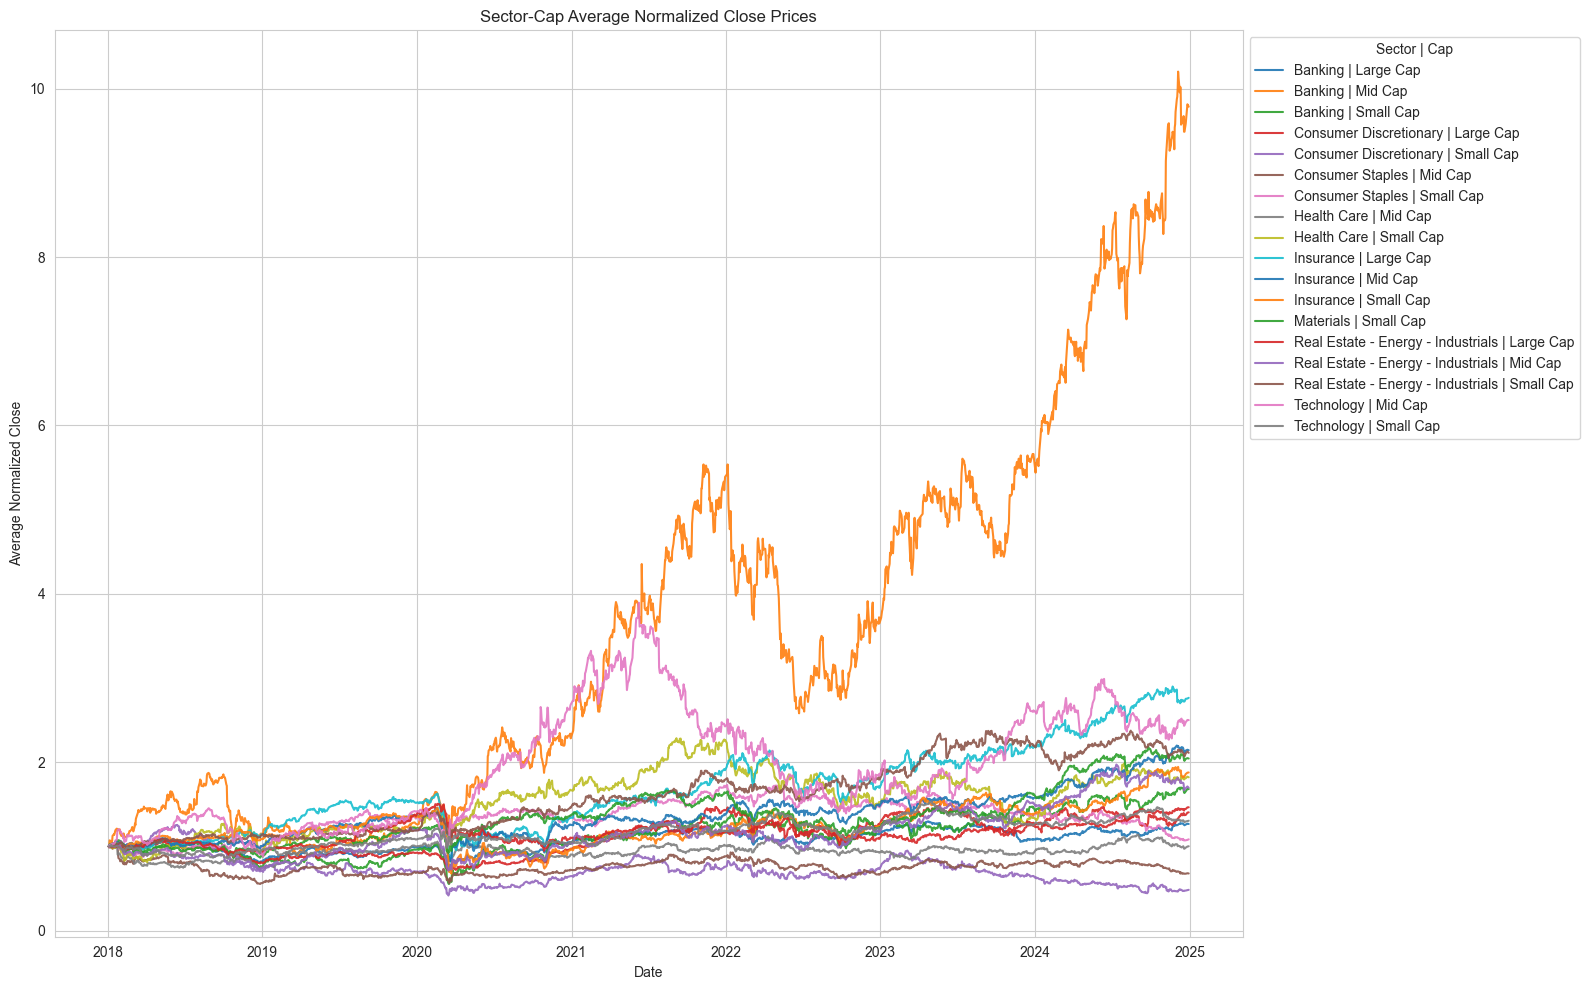


Sector-Cap Total Return Over Period:
                                                Total Return
Banking | Mid Cap                                   8.786141
Insurance | Large Cap                               1.765201
Technology | Mid Cap                                1.500654
Insurance | Mid Cap                                 1.143256
Real Estate - Energy - Industrials | Small Cap      1.112241
Materials | Small Cap                               1.044375
Insurance | Small Cap                               0.878770
Health Care | Small Cap                             0.821732
Real Estate - Energy - Industrials | Mid Cap        0.696869
Banking | Small Cap                                 0.681153
Real Estate - Energy - Industrials | Large Cap      0.465489
Consumer Discretionary | Large Cap                  0.405263
Technology | Small Cap                              0.305262
Banking | Large Cap                                 0.267279
Consumer Staples | Small Cap                   

In [37]:
# Compute sector-cap combination average normalized close prices and plot

# Identify present combinations
combos = (
    market.dropna(subset=["sector","cap"])
          .groupby(["sector","cap"])['ticker']
          .nunique()
          .reset_index()
)

sector_cap_avg = {}
for _, row in combos.iterrows():
    sector = row["sector"]
    cap = row["cap"]
    tickers_combo = market.loc[(market["sector"] == sector) & (market["cap"] == cap), "ticker"].unique()
    data = []
    for t in tickers_combo:
        g = market[market["ticker"] == t].sort_values("date")
        norm_close = g.set_index("date")["close"] / g.set_index("date")["close"].iloc[0]
        norm_close = norm_close.rename(t)
        data.append(norm_close)
    if data:
        dfc = pd.concat(data, axis=1)
        sector_cap_avg[(sector, cap)] = dfc.mean(axis=1)

# Build aligned DataFrame over all combos
if sector_cap_avg:
    all_dates_combo = sorted(set().union(*[s.index for s in sector_cap_avg.values()]))
    combo_df = pd.DataFrame(index=all_dates_combo)
    for (sector, cap), series in sector_cap_avg.items():
        col = f"{sector} | {cap}"
        combo_df[col] = series.reindex(combo_df.index).ffill()

    # Plot a subset if too many lines; otherwise plot all
    plt.figure(figsize=(16, 10))
    for col in combo_df.columns:
        plt.plot(combo_df.index, combo_df[col], label=col, alpha=0.9)
    plt.title("Sector-Cap Average Normalized Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Average Normalized Close")
    plt.legend(title="Sector | Cap", bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    os.makedirs("../../figures/market_exploration", exist_ok=True)
    plt.savefig("../../figures/market_exploration/sector_cap_average_normalized_close_prices.png", dpi=150)
    plt.show()

    # Save table and total returns
    os.makedirs("../../tables", exist_ok=True)
    combo_df.to_csv("../../tables/sector_cap_average_normalized_close_prices.csv")
    combo_final_returns = {
        col: combo_df[col].iloc[-1] / combo_df[col].iloc[0] - 1 for col in combo_df.columns
    }
    combo_final_returns_df = (
        pd.DataFrame.from_dict(combo_final_returns, orient='index', columns=['Total Return'])
          .sort_values('Total Return', ascending=False)
    )
    print("\nSector-Cap Total Return Over Period:")
    print(combo_final_returns_df)
else:
    print("No sector-cap combinations found.")



## Rolling Volatility

In [38]:
# Rolling window lengths (trading days)
window_short = 21     # ~1 month
window_medium = 63    # ~1 quarter
window_long = 200     # long-term trend
trading_days = 252    # per-year convention in finance

In [39]:
market.head()

date       open       high        low      close     volume  \
0 2018-01-03  19.562585  19.749109  19.547663  19.719265  5519259.0   
1 2018-01-04  19.838642  19.958017  19.749111  19.935635  5738092.0   
2 2018-01-05  19.920712  20.084852  19.883406  20.084852  4435594.0   
3 2018-01-08  20.099777  20.137081  19.920715  20.092316  5029780.0   
4 2018-01-09  19.972940  20.196768  19.935636  20.196768  6974533.0   

   adj close ticker                              sector      cap    return  \
0  19.719265    ABB  Real Estate - Energy - Industrials  Mid Cap       NaN   
1  19.935635    ABB  Real Estate - Energy - Industrials  Mid Cap  0.010972   
2  20.084852    ABB  Real Estate - Energy - Industrials  Mid Cap  0.007485   
3  20.092316    ABB  Real Estate - Energy - Industrials  Mid Cap  0.000372   
4  20.196768    ABB  Real Estate - Energy - Industrials  Mid Cap  0.005199   

   log_return  year  
0         NaN  2018  
1    0.010913  2018  
2    0.007457  2018  
3    0.000372  2018  
4    0.005185  2018

In [50]:
# Rolling features (short, medium, long) ===
# Uses your window_short, window_medium, window_long variables.
# All features are shifted by 1 day to avoid look-ahead.

# Short- and medium-term volatility (std of daily returns)
market['vol21'] = (
    market.groupby('ticker')['return']
          .rolling(window_short, min_periods=window_short).std()
          .reset_index(level=0, drop=True)
          .shift(1)
)
market['vol63'] = (
    market.groupby('ticker')['return']
          .rolling(window_medium, min_periods=window_medium).std()
          .reset_index(level=0, drop=True)
          .shift(1)
)

# Return EMAs (momentum of returns)
market['ret_ema21'] = (
    market.groupby('ticker')['return']
          .transform(lambda s: s.ewm(span=window_short, adjust=False).mean())
          .shift(1)
)
market['ret_ema63'] = (
    market.groupby('ticker')['return']
          .transform(lambda s: s.ewm(span=window_medium, adjust=False).mean())
          .shift(1)
)

# Price moving averages
market['px_ma21'] = (
    market.groupby('ticker')['close']
          .rolling(window_short, min_periods=window_short).mean()
          .reset_index(level=0, drop=True)
          .shift(1)
)
market['px_ma63'] = (
    market.groupby('ticker')['close']
          .rolling(window_medium, min_periods=window_medium).mean()
          .reset_index(level=0, drop=True)
          .shift(1)
)

# Long-term price trend (uses a lenient min_periods so early data is not lost)
market['px_ma200'] = (
    market.groupby('ticker')['close']
          .rolling(window_long, min_periods=50).mean()
          .reset_index(level=0, drop=True)
          .shift(1)
)

# Simple trend flag: short MA above long MA
market['trend200_up'] = (market['px_ma21'] > market['px_ma200']).astype(int)

print("✅ Added rolling volatility, EMA, and MA features.")
display(market[['ticker','date','vol21','vol63','ret_ema21','ret_ema63','px_ma21','px_ma63','px_ma200','trend200_up']].head(8))


✅ Added rolling volatility, EMA, and MA features.


ticker       date  vol21  vol63  ret_ema21  ret_ema63  px_ma21  px_ma63  \
0    ABB 2018-01-03    NaN    NaN        NaN        NaN      NaN      NaN   
1    ABB 2018-01-04    NaN    NaN        NaN        NaN      NaN      NaN   
2    ABB 2018-01-05    NaN    NaN   0.010972   0.010972      NaN      NaN   
3    ABB 2018-01-08    NaN    NaN   0.010655   0.010864      NaN      NaN   
4    ABB 2018-01-09    NaN    NaN   0.009721   0.010536      NaN      NaN   
5    ABB 2018-01-10    NaN    NaN   0.009309   0.010369      NaN      NaN   
6    ABB 2018-01-11    NaN    NaN   0.007825   0.009825      NaN      NaN   
7    ABB 2018-01-12    NaN    NaN   0.007215   0.009553      NaN      NaN   

   px_ma200  trend200_up  
0       NaN            0  
1       NaN            0  
2       NaN            0  
3       NaN            0  
4       NaN            0  
5       NaN            0  
6       NaN            0  
7       NaN            0